In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from helper import tool_palette, tool_text_styling_dict

plt.style.use("./paper.mplstyle")

In [2]:
summ_diff = pd.read_table("../results/relman_abx/birdman_results.beta_var.tsv", sep="\t", index_col=0)
summ_diff.index = summ_diff.index.astype(str)
summ_diff.head()

,Intercept_mean,"C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.preCp]_mean","C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.FirstCp]_mean","C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.FirstWPC]_mean","C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.Interim]_mean","C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.SecondCp]_mean","C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.SecondWPC]_mean",Intercept_std,"C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.preCp]_std","C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.FirstCp]_std","C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.FirstWPC]_std","C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.Interim]_std","C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.SecondCp]_std","C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.SecondWPC]_std"
Feature,,,,,,,,,,,,,,
F174654,-9.613275,-4.216379,-3.813427,2.497396,-1.377877,1.418101,-3.815373,1.399195,2.251931,4.508367,4.567098,2.674981,2.905351,5.071326
F833381,-10.576976,0.528293,-2.952751,1.487714,-4.991274,3.409547,0.452093,1.399263,2.051525,3.904000,3.866181,3.796104,3.874811,2.875097
F4398588,-11.148501,-2.122278,1.564044,4.813501,-1.153654,-0.076217,-5.563684,1.413151,4.029797,4.779592,3.952426,2.143345,2.207584,4.075867
F4457453,-7.259521,-2.905552,-1.442756,3.741885,-1.544690,0.543856,-12.435193,1.353863,2.009772,2.555298,2.495104,2.021203,2.062375,4.952279
F215097,-7.069135,-0.976397,2.150305,-3.623367,-1.059936,-1.461279,-0.997864,1.343560,1.936925,2.237472,2.246834,2.010186,2.194302,3.047044


In [3]:
# Replace long, obnoxious strings with more informative labels
summ_diff.columns[1:7].to_list()

["C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.preCp]_mean",
 "C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.FirstCp]_mean",
 "C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.FirstWPC]_mean",
 "C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.Interim]_mean",
 "C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.SecondCp]_mean",
 "C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.SecondWPC]_mean"]

In [4]:
levels = ["preCp", "FirstCp", "FirstWPC", "Interim", "SecondCp", "SecondWPC", "PostCp"]
levels_diffs = [levels[i] + "_vs_" + levels[i-1] for i in range(1, len(levels))]
levels_diffs

['FirstCp_vs_preCp',
 'FirstWPC_vs_FirstCp',
 'Interim_vs_FirstWPC',
 'SecondCp_vs_Interim',
 'SecondWPC_vs_SecondCp',
 'PostCp_vs_SecondWPC']

In [5]:
rename_dict = dict(
    zip(
        summ_diff.columns[1:7], # non-Intercept mean columns
        [x + "_mean" for x in levels_diffs]
    )
)
rename_dict.update(dict(
    zip(
        summ_diff.columns[8:], # non-Intercept std columns
        [x + "_std" for x in levels_diffs]
    )
))

In [6]:
summ_diff = summ_diff.rename(columns=rename_dict)
summ_diff.head()

,Intercept_mean,FirstCp_vs_preCp_mean,FirstWPC_vs_FirstCp_mean,Interim_vs_FirstWPC_mean,SecondCp_vs_Interim_mean,SecondWPC_vs_SecondCp_mean,PostCp_vs_SecondWPC_mean,Intercept_std,FirstCp_vs_preCp_std,FirstWPC_vs_FirstCp_std,Interim_vs_FirstWPC_std,SecondCp_vs_Interim_std,SecondWPC_vs_SecondCp_std,PostCp_vs_SecondWPC_std
Feature,,,,,,,,,,,,,,
F174654,-9.613275,-4.216379,-3.813427,2.497396,-1.377877,1.418101,-3.815373,1.399195,2.251931,4.508367,4.567098,2.674981,2.905351,5.071326
F833381,-10.576976,0.528293,-2.952751,1.487714,-4.991274,3.409547,0.452093,1.399263,2.051525,3.904000,3.866181,3.796104,3.874811,2.875097
F4398588,-11.148501,-2.122278,1.564044,4.813501,-1.153654,-0.076217,-5.563684,1.413151,4.029797,4.779592,3.952426,2.143345,2.207584,4.075867
F4457453,-7.259521,-2.905552,-1.442756,3.741885,-1.544690,0.543856,-12.435193,1.353863,2.009772,2.555298,2.495104,2.021203,2.062375,4.952279
F215097,-7.069135,-0.976397,2.150305,-3.623367,-1.059936,-1.461279,-0.997864,1.343560,1.936925,2.237472,2.246834,2.010186,2.194302,3.047044


In [7]:
# Center each mean at 0
mean_level_diffs = summ_diff.columns[1:7]
summ_diff_cent = summ_diff[mean_level_diffs].apply(lambda x: x - x.mean(), axis=0)
summ_diff_std = summ_diff.filter(like="std")

In [8]:
summ_diff_cent

,FirstCp_vs_preCp_mean,FirstWPC_vs_FirstCp_mean,Interim_vs_FirstWPC_mean,SecondCp_vs_Interim_mean,SecondWPC_vs_SecondCp_mean,PostCp_vs_SecondWPC_mean
Feature,,,,,,
F174654,-3.411482,-3.756095,1.890431,-0.808529,1.362574,-2.772940
F833381,1.333190,-2.895419,0.880749,-4.421926,3.354020,1.494525
F4398588,-1.317381,1.621376,4.206537,-0.584306,-0.131743,-4.521252
F4457453,-2.100655,-1.385424,3.134920,-0.975342,0.488330,-11.392761
F215097,-0.171500,2.207636,-4.230331,-0.490588,-1.516806,0.044569
...,...,...,...,...,...,...
F4089776,1.543981,0.167340,-1.748894,0.757420,-0.397028,1.052410
F182118,1.363580,0.788962,-1.118067,1.922213,-2.981556,0.174559
F4404461,1.169440,-1.614153,-2.064326,-0.258384,1.194484,0.524905


In [9]:
gg97_tax = pd.read_table("../data/relman_abx/ref/97_otu_taxonomy.txt", sep="\t", index_col=0, header=None)
gg97_tax.columns = ["Taxon"]
gg97_tax = gg97_tax["Taxon"].str.split("; ", expand=True)
gg97_tax.columns = list("kpcofgs")
gg97_tax.index.name = "OTU_ID"
gg97_tax.index = [f"F{x}" for x in gg97_tax.index]
gg97_tax = gg97_tax.loc[summ_diff_cent.index]
print(gg97_tax.shape)
gg97_tax.head()

(822, 7)


,k,p,c,o,f,g,s
Feature,,,,,,,
F174654,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Ruminococcaceae,g__Ruminococcus,s__bromii
F833381,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,g__Coprococcus,s__
F4398588,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Ruminococcaceae,g__,s__
F4457453,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Veillonellaceae,g__Dialister,s__
F215097,k__Bacteria,p__Proteobacteria,c__Betaproteobacteria,o__Burkholderiales,f__Alcaligenaceae,g__Sutterella,s__


In [10]:
gg97_tax_counts = gg97_tax["g"].value_counts().drop("g__")
top_genera = gg97_tax_counts[gg97_tax_counts >= 10].index
top_genera

Index(['g__Bacteroides', 'g__Oscillospira', 'g__Ruminococcus', 'g__Blautia',
       'g__Coprococcus', 'g__Faecalibacterium', 'g__Roseburia',
       'g__[Ruminococcus]'],
      dtype='object')

In [11]:
genus_map = gg97_tax["g"].to_dict()

In [12]:
subj_df = pd.read_table("../results/relman_abx/birdman_results.subj.tsv", sep="\t", index_col=0)
subj_df.head()

,494.D_Intercept_mean,"494.D_C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.preCp]_mean","494.D_C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.FirstCp]_mean","494.D_C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.FirstWPC]_mean","494.D_C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.Interim]_mean","494.D_C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.SecondCp]_mean","494.D_C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.SecondWPC]_mean",494.E_Intercept_mean,"494.E_C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.preCp]_mean","494.E_C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.FirstCp]_mean",...,"494.E_C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.Interim]_std","494.E_C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.SecondCp]_std","494.E_C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.SecondWPC]_std",494.F_Intercept_std,"494.F_C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.preCp]_std","494.F_C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.FirstCp]_std","494.F_C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.FirstWPC]_std","494.F_C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.Interim]_std","494.F_C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.SecondCp]_std","494.F_C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.SecondWPC]_std"
Feature,,,,,,,,,,,,,,,,,,,,,
F174654,-1.798556,-1.444716,2.576869,2.134634,-2.322315,-3.218823,-0.674911,-5.453521,-1.398138,-0.417126,...,2.703130,2.737526,2.887178,1.667970,2.293426,2.545921,2.597883,2.513365,2.389366,3.060682
F833381,-0.014158,2.936449,-1.006566,-1.021270,-0.575479,0.932117,-0.229203,-5.612121,-1.534927,-0.230836,...,2.712443,2.719147,2.768779,1.813280,2.242537,2.533289,2.472851,2.601661,2.703388,2.898865
F4398588,-3.110271,0.966562,0.933051,0.554764,-1.617285,2.343393,-0.796350,-2.589574,-1.536751,-0.952962,...,2.140402,2.204113,2.747437,1.783025,2.733754,2.693571,2.526101,2.517156,2.579762,2.924987
F4457453,-2.112876,1.234386,-0.611971,-0.820019,-3.912106,1.195687,0.045618,-0.606231,-3.599359,0.199331,...,2.055170,2.102979,2.924562,1.495782,2.103618,2.307245,2.352129,2.240833,2.198173,3.012957
F215097,-0.986059,1.281208,-0.175008,-0.314288,-4.376821,-2.350513,-0.885020,-2.418051,1.884789,-3.581570,...,2.202204,2.264334,2.627874,1.521792,2.186479,2.318490,2.233781,2.128215,2.186637,2.940150


In [13]:
import re

subj_regex = re.compile("(494\.[DEF])_C\(.*\)\[D\.(\w+)\]_(\w+)")

levels_dict = dict(zip(levels, levels_diffs))

new_cols = []
for col in subj_df.columns:
    if "Intercept" in col:
        new_cols.append(col)
        continue
    subj, level, mean_or_std = subj_regex.search(col).groups()
    this_col = f"{subj}_{levels_dict[level]}_{mean_or_std}"
    new_cols.append(this_col)

subj_df_renamed = subj_df.copy()
subj_df_renamed.columns = new_cols
subj_df_renamed.index = subj_df_renamed.index.astype(str)

for col in subj_df_renamed.columns:
    if "mean" in col:
        subj_df_renamed[col] = subj_df_renamed[col] - subj_df_renamed[col].mean()

subj_df_renamed.head()

,494.D_Intercept_mean,494.D_FirstCp_vs_preCp_mean,494.D_FirstWPC_vs_FirstCp_mean,494.D_Interim_vs_FirstWPC_mean,494.D_SecondCp_vs_Interim_mean,494.D_SecondWPC_vs_SecondCp_mean,494.D_PostCp_vs_SecondWPC_mean,494.E_Intercept_mean,494.E_FirstCp_vs_preCp_mean,494.E_FirstWPC_vs_FirstCp_mean,...,494.E_SecondCp_vs_Interim_std,494.E_SecondWPC_vs_SecondCp_std,494.E_PostCp_vs_SecondWPC_std,494.F_Intercept_std,494.F_FirstCp_vs_preCp_std,494.F_FirstWPC_vs_FirstCp_std,494.F_Interim_vs_FirstWPC_std,494.F_SecondCp_vs_Interim_std,494.F_SecondWPC_vs_SecondCp_std,494.F_PostCp_vs_SecondWPC_std
Feature,,,,,,,,,,,,,,,,,,,,,
F174654,-0.161772,-0.856453,2.276151,2.071102,-2.028872,-3.406042,-0.580127,-3.092003,-1.623318,0.011709,...,2.703130,2.737526,2.887178,1.667970,2.293426,2.545921,2.597883,2.513365,2.389366,3.060682
F833381,1.622626,3.524711,-1.307284,-1.084802,-0.282036,0.744897,-0.134419,-3.250603,-1.760106,0.197999,...,2.712443,2.719147,2.768779,1.813280,2.242537,2.533289,2.472851,2.601661,2.703388,2.898865
F4398588,-1.473487,1.554824,0.632333,0.491232,-1.323842,2.156173,-0.701567,-0.228056,-1.761930,-0.524127,...,2.140402,2.204113,2.747437,1.783025,2.733754,2.693571,2.526101,2.517156,2.579762,2.924987
F4457453,-0.476092,1.822649,-0.912689,-0.883551,-3.618663,1.008467,0.140402,1.755287,-3.824539,0.628166,...,2.055170,2.102979,2.924562,1.495782,2.103618,2.307245,2.352129,2.240833,2.198173,3.012957
F215097,0.650725,1.869470,-0.475726,-0.377820,-4.083378,-2.537733,-0.790236,-0.056534,1.659609,-3.152735,...,2.202204,2.264334,2.627874,1.521792,2.186479,2.318490,2.233781,2.128215,2.186637,2.940150


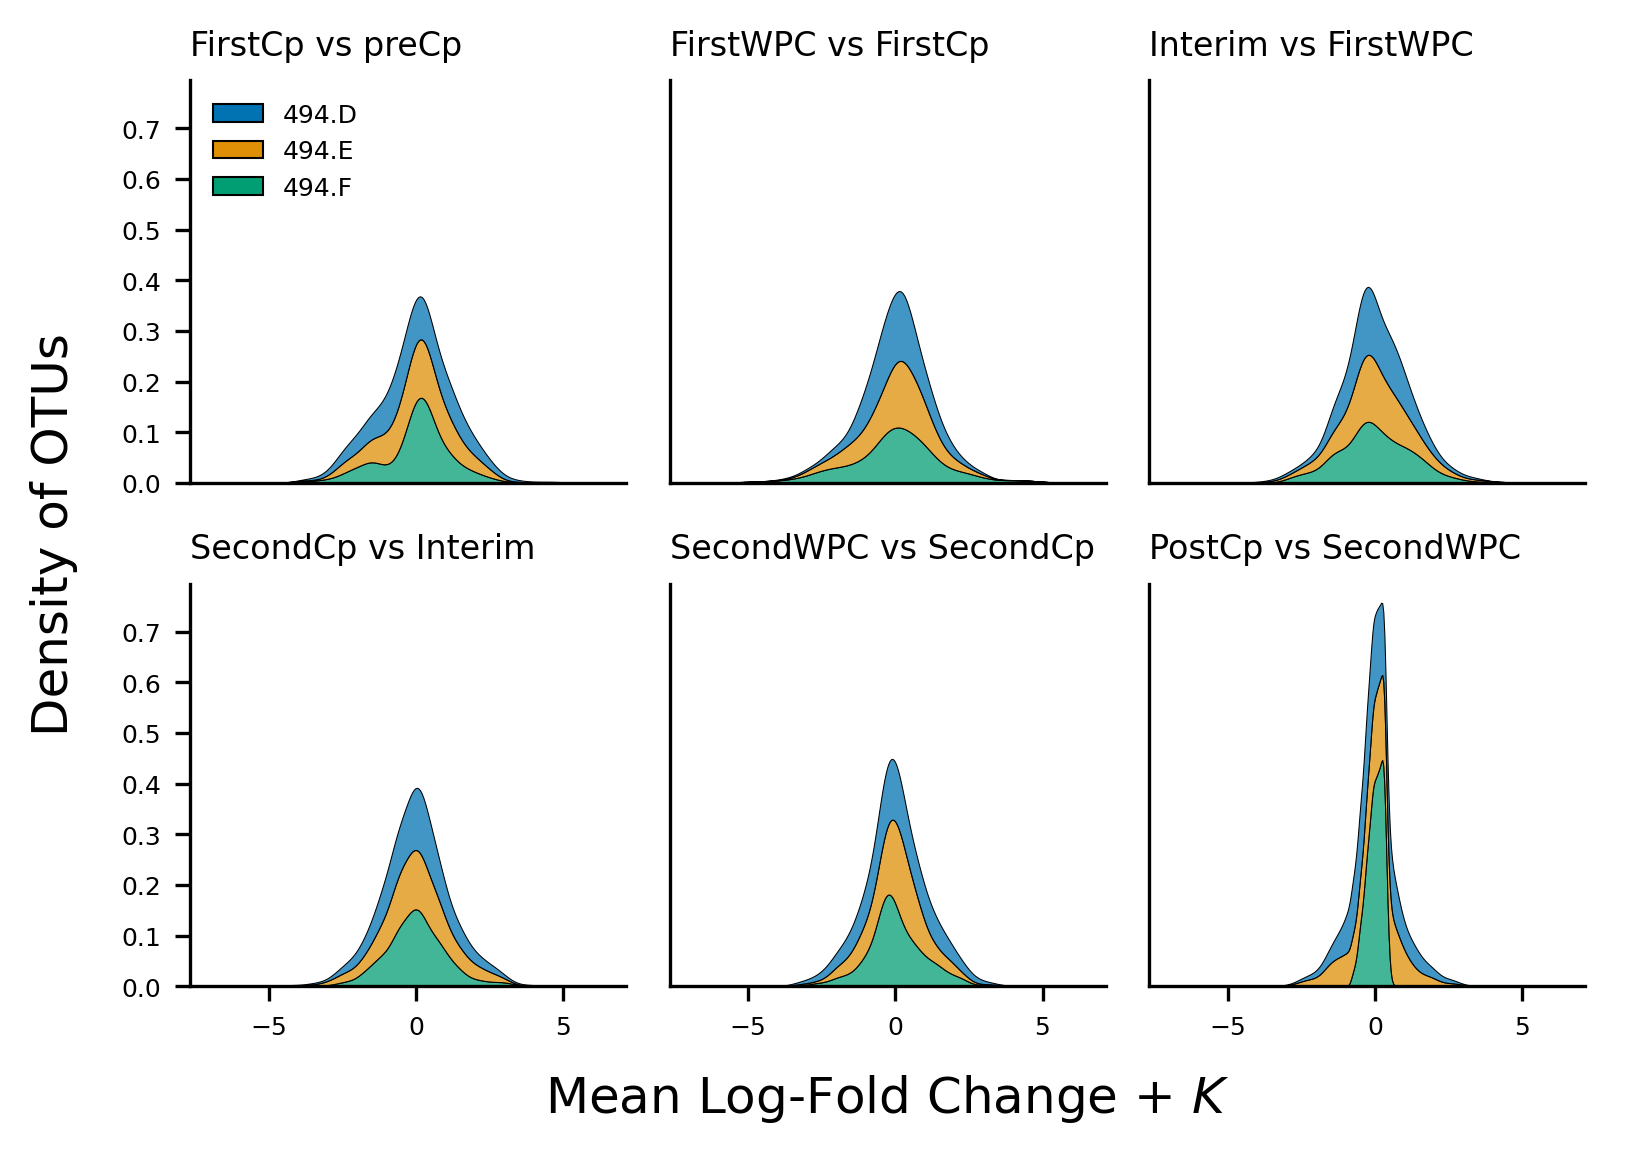

In [14]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.1, hspace=0.25)

subj_palette = dict(
    zip(
        ["494.D", "494.E", "494.F"],
        sns.color_palette("colorblind", 3)
    )
)

for i, (this_levels_diff, ax) in enumerate(zip(levels_diffs, axs.flatten())):
    _df = (
        subj_df_renamed
        .filter(like=this_levels_diff)
        .filter(like="_mean")
        .melt()
    )
    _df["variable"] = _df["variable"].str.extract("(494\.[DEF])")

    sns.kdeplot(
        data=_df,
        x="value",
        hue="variable",
        ax=ax,
        palette=subj_palette,
        fill=True,
        legend=False,
        multiple="stack",
        linewidth=0.25
    )
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.tick_params("both", labelsize=6)
    ax.set_title(this_levels_diff.replace("_", " "), fontsize=8)
    if i % 3 != 0:
        ax.tick_params("y", width=0)
    if i < 3:
        ax.tick_params("x", width=0)
    
from matplotlib.patches import Patch

subj_patches = [
    Patch(facecolor=color, label=label, linewidth=0.5, edgecolor="black")
    for label, color in subj_palette.items()
]

axs[0, 0].legend(
    handles=subj_patches,
    loc="upper left",
    fontsize=6,
    frameon=False
)

big_ax = fig.add_subplot(111, frameon=False)
big_ax.tick_params("both", labelcolor="none", bottom=False, left=False)
big_ax.set_ylabel("Density of OTUs")
big_ax.set_xlabel(r"Mean Log-Fold Change + $K$")

plt.show()

In [15]:
from itertools import combinations, product
import scipy.stats as ss

subjs = ["494.D", "494.E", "494.F"]
subj_combos = list(combinations(subjs, 2))

corr_dict = dict()
p_dict = dict()

for this_levels_diff in levels_diffs:
    tmp_dict_1 = dict()
    tmp_dict_2 = dict()
    for s1, s2 in subj_combos:
        _x = subj_df_renamed[f"{s2}_{this_levels_diff}_mean"].values
        _y = subj_df_renamed[f"{s1}_{this_levels_diff}_mean"].values
        rho, pval = ss.kendalltau(_x, _y)
        tmp_dict_1[" vs ".join([s1, s2])] = rho
        tmp_dict_2[" vs ".join([s1, s2])] = pval
    corr_dict[this_levels_diff] = tmp_dict_1
    p_dict[this_levels_diff] = tmp_dict_2

corr_df = pd.DataFrame.from_dict(corr_dict, orient="index")
p_df = pd.DataFrame.from_dict(p_dict, orient="index")
corr_df

,494.D vs 494.E,494.D vs 494.F,494.E vs 494.F
FirstCp_vs_preCp,-0.453708,-0.366347,-0.164345
FirstWPC_vs_FirstCp,-0.072379,-0.408750,-0.495802
Interim_vs_FirstWPC,-0.209984,-0.367651,-0.404275
SecondCp_vs_Interim,-0.454899,-0.255054,-0.275562
SecondWPC_vs_SecondCp,-0.406551,-0.431445,-0.146190
PostCp_vs_SecondWPC,-0.727180,-0.095762,-0.104653


In [16]:
_df = summ_diff_cent.join(gg97_tax, how="inner")
# https://stackoverflow.com/a/32801170
genus_df = (
    _df
    .groupby("g")[summ_diff_cent.columns]
    .size()
    .to_frame(name="counts")
    .join(_df.groupby("g").median())
    #.query("counts >= 10")
    .sort_values(by="counts", ascending=False)
    .drop(index=["g__"])
)
genus_df.head()

,counts,FirstCp_vs_preCp_mean,FirstWPC_vs_FirstCp_mean,Interim_vs_FirstWPC_mean,SecondCp_vs_Interim_mean,SecondWPC_vs_SecondCp_mean,PostCp_vs_SecondWPC_mean
g,,,,,,,
g__Bacteroides,79,-0.272265,-0.147684,0.595510,-0.054855,-0.035457,1.066033
g__Oscillospira,36,0.393898,-0.956925,0.285193,0.432320,0.328927,1.259379
g__Ruminococcus,34,-0.417352,0.249892,-0.147322,0.484171,-0.048594,0.705057
g__Blautia,33,0.475822,0.701878,-0.761568,0.915875,-1.089374,1.682258
g__Coprococcus,28,0.803570,0.257167,-0.709461,0.928054,-1.268523,1.110034


In [17]:
genus_df.query("counts >= 3").drop(columns=["counts"]).std(axis=1).sort_values().tail(4)

g
g__Dorea              1.397388
g__Veillonella        2.312008
g__Dehalobacterium    2.667457
g__Dialister          2.742216
dtype: float64

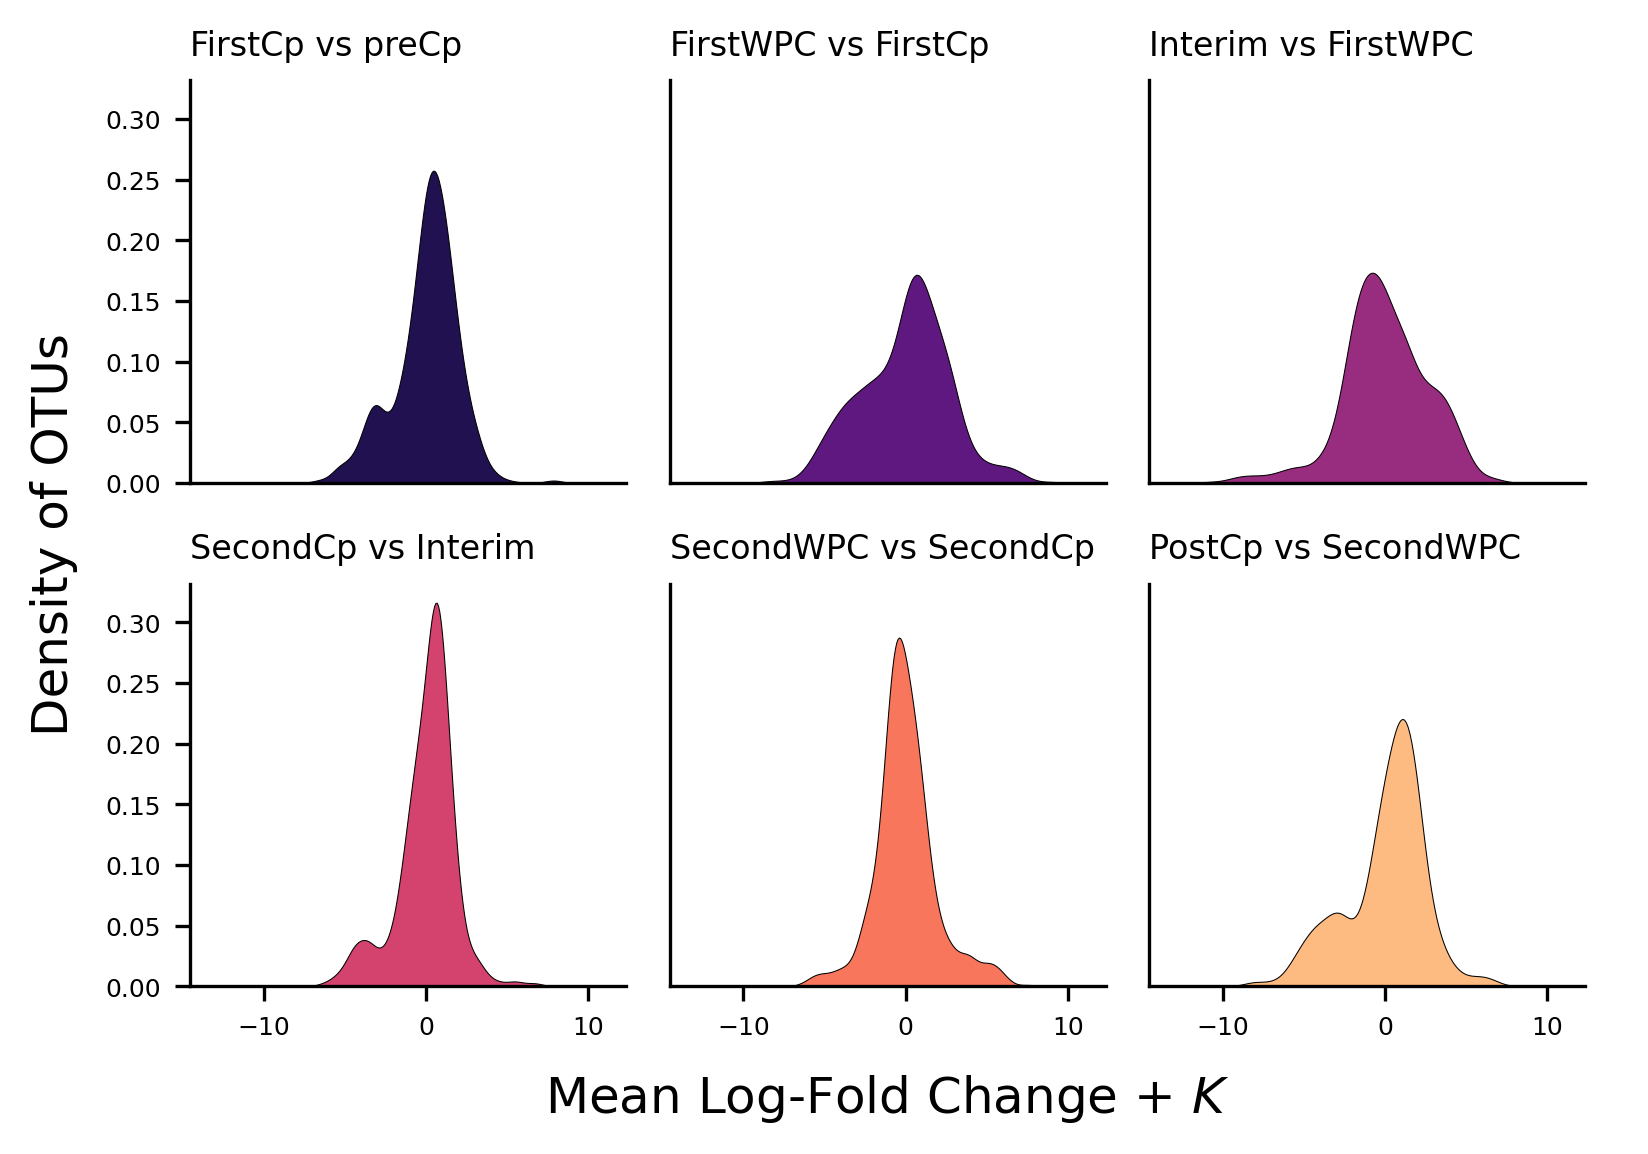

In [18]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.1, hspace=0.25)

palette = dict(zip(mean_level_diffs, sns.color_palette("magma", 6)))

for i, (ax, col) in enumerate(zip(axs.flatten(), mean_level_diffs)):
    #ax.hist(summ_diff_cent[col], bins=15, color=palette.get(col))
    sns.kdeplot(
        data=summ_diff_cent[col],
        color=palette.get(col),
        fill=True,
        alpha=1,
        linewidth=0.25,
        edgecolor="black",
        ax=ax
    )
    ax.set_ylabel("")
    ax.set_xlabel("")
    new_title = col.replace("_mean", "").replace("_", " ")
    ax.set_title(new_title, fontsize=8)
    ax.tick_params("both", labelsize=6)
    if i % 3 != 0:
        ax.tick_params("y", width=0)
    if i < 3:
        ax.tick_params("x", width=0)
        
    
big_ax = fig.add_subplot(111, frameon=False)
big_ax.tick_params("both", labelcolor="none", bottom=False, left=False)
big_ax.set_ylabel("Density of OTUs")
big_ax.set_xlabel(r"Mean Log-Fold Change + $K$")

plt.show()

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(summ_diff_cent[mean_level_diffs])

ranks_pca = PCA(n_components=6)
Y = ranks_pca.fit_transform(X)
feature_pcs_df = pd.DataFrame(Y, index=summ_diff_cent.index)
feature_pcs_df["Genus"] = [genus_map[x] for x in feature_pcs_df.index]

genera_of_interest = [
    "g__Dehalobacterium",
    "g__Dialister",
    "g__Veillonella",
    "g__Dorea"
]
feature_pcs_df["Genus"] = [
    x[3:] if x in genera_of_interest else "Other"
    for x in feature_pcs_df["Genus"]
]
feature_pcs_df["Genus"] = pd.Categorical(
    feature_pcs_df["Genus"],
    categories=[x[3:] for x in genera_of_interest] + ["Other"],
    ordered=True
)
print(ranks_pca.explained_variance_ratio_)
feature_pcs_df.head()

[0.29972698 0.26904686 0.19575549 0.13904776 0.05887064 0.03755227]


,0,1,2,3,4,5,Genus
Feature,,,,,,,
F174654,1.658805,-0.341811,1.558981,0.599737,0.717946,1.179014,Other
F833381,2.548526,0.677813,-0.826959,-1.897872,0.259329,0.449191,Other
F4398588,1.245818,-0.190958,1.353320,1.274444,-1.309043,-0.338761,Other
F4457453,2.873417,-0.968935,1.139200,3.448289,-1.179223,0.859376,Dialister
F215097,-1.141406,0.986365,-0.867027,0.496947,-0.372340,0.777707,Other


In [20]:
diff_pcs_df = pd.DataFrame(ranks_pca.components_.T, index=mean_level_diffs)
diff_pcs_df

,0,1,2,3,4,5
FirstCp_vs_preCp_mean,0.069269,-0.348982,-0.773999,-0.190101,-0.239203,-0.425421
FirstWPC_vs_FirstCp_mean,-0.279659,0.653669,0.032278,0.234123,-0.431427,-0.502516
Interim_vs_FirstWPC_mean,0.348217,-0.359803,0.606301,-0.254522,-0.350893,-0.440203
SecondCp_vs_Interim_mean,-0.513447,-0.404241,0.150217,0.373230,0.457434,-0.449277
SecondWPC_vs_SecondCp_mean,0.594320,0.347408,-0.072612,0.006379,0.602248,-0.397587
PostCp_vs_SecondWPC_mean,-0.422958,0.193306,0.066674,-0.839598,0.248149,-0.113097


In [21]:
genus_pal = dict(zip(
    [x[3:] for x in genera_of_interest],
    sns.color_palette("bright", len(genera_of_interest)).as_hex()
))
genus_pal["Other"] = "lightgray"
genus_pal

{'Dehalobacterium': '#023eff',
 'Dialister': '#ff7c00',
 'Veillonella': '#1ac938',
 'Dorea': '#e8000b',
 'Other': 'lightgray'}

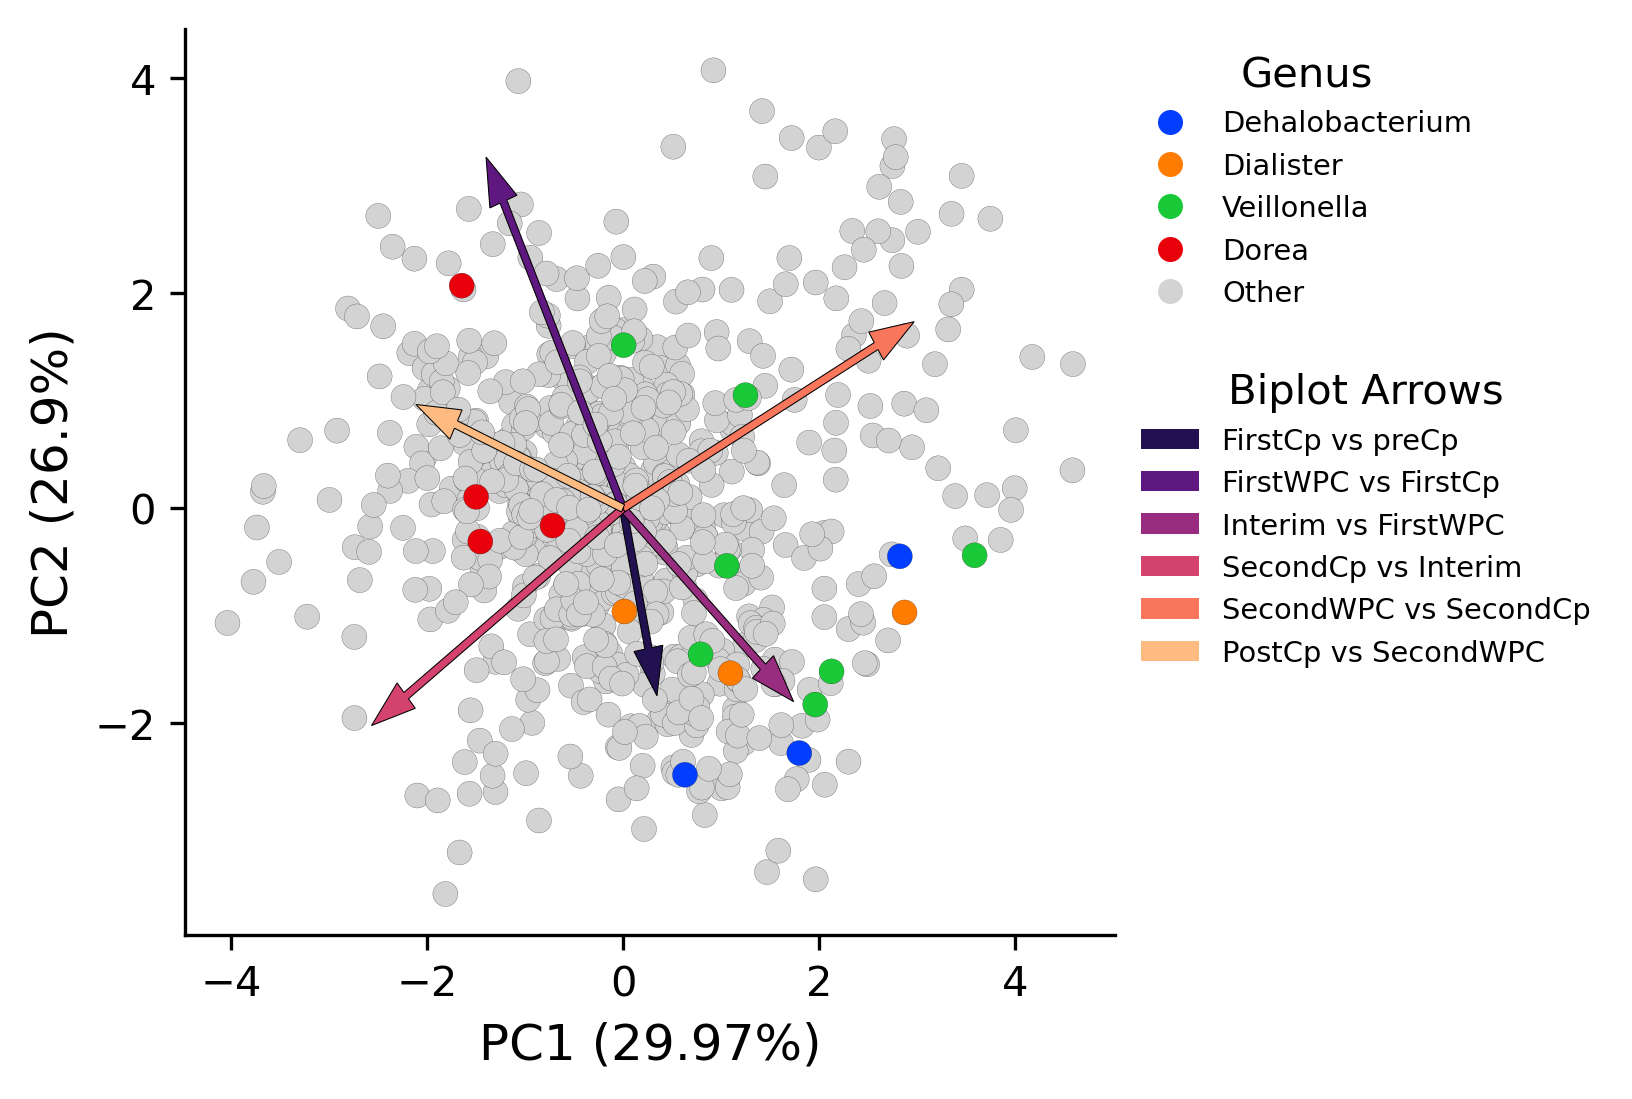

In [22]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib import ticker as mticker

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
#ax.set_aspect("equal")

leg_patches = []
for g, _df in feature_pcs_df.groupby("Genus"):
    sns.scatterplot(
        data=_df,
        x=0,
        y=1,
        ax=ax,
        edgecolor="black",
        palette=genus_pal,
        #hue_order=genus_pal.keys(),
        hue="Genus",
        linewidth=0.05,
        zorder=0 if g == "Other" else 1
    )
    line = Line2D([0], [0], mfc=genus_pal[g], label=g, marker="o",
                  lw=0, mec="None") 
    leg_patches.append(line)
    
genus_leg = ax.legend(
    handles=leg_patches,
    loc="upper left",
    fontsize="x-small",
    bbox_to_anchor=[1, 1],
    frameon=False,
    title="Genus"
)
ax.add_artist(genus_leg)

scale = 5
contrast_patches = []
for diff, row in diff_pcs_df.iterrows():
    arrow_coords = (row[0]*scale, row[1]*scale)
    label = diff.replace("_mean", "").replace("_", " ")
    ax.arrow(
        x=0, y=0,
        dx=arrow_coords[0], dy=arrow_coords[1],
        head_width=0.3,
        length_includes_head=True,
        width=0.075,
        linewidth=0.25,
        edgecolor="black",
        facecolor=palette.get(diff),
        label=label
    )
    patch = Patch(facecolor=palette.get(diff), label=label)
    contrast_patches.append(patch)

ax.legend(
    handles=contrast_patches,
    title="Biplot Arrows",
    loc="upper left",
    fontsize="x-small",
    frameon=False,
    ncol=1,
    bbox_to_anchor=[1, 0.65]
)

var_explained = ranks_pca.explained_variance_ratio_ * 100
ax.set_xlabel(f"PC1 ({round(var_explained[0], 2)}%)")
ax.set_ylabel(f"PC2 ({round(var_explained[1], 2)}%)")

ax.xaxis.set_major_locator(mticker.MaxNLocator(5))
ax.yaxis.set_major_locator(mticker.MaxNLocator(5))

#plt.savefig("../figures/relman_abx/contrast_pca.pdf")
plt.show()

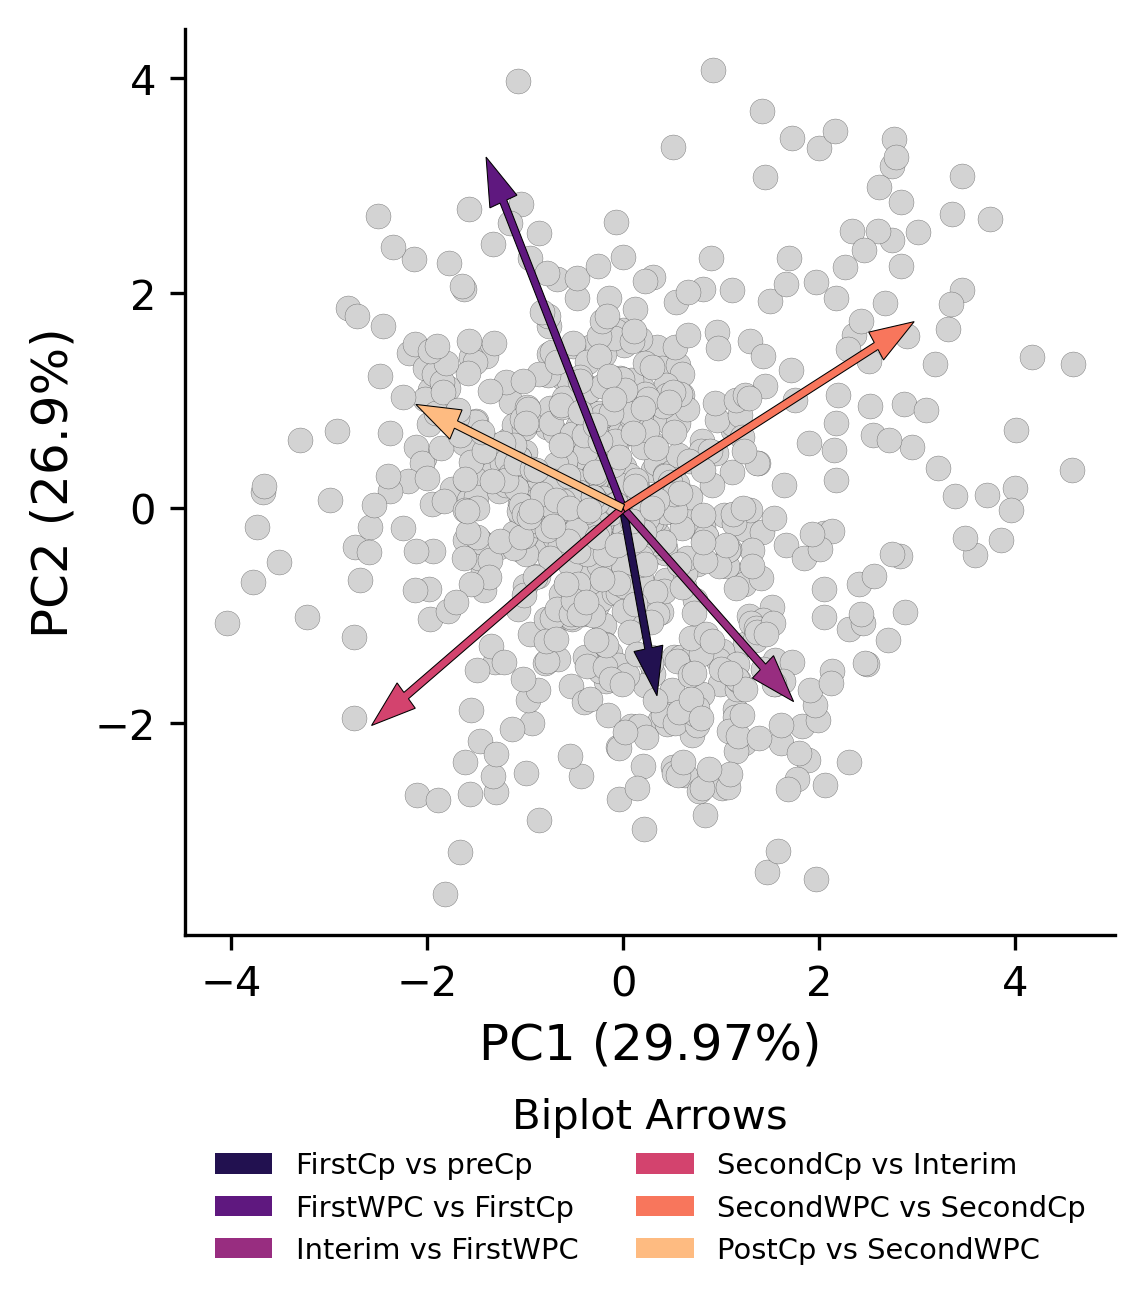

In [23]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib import ticker as mticker

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
#ax.set_aspect("equal")

sns.scatterplot(
    data=feature_pcs_df,
    x=0,
    y=1,
    ax=ax,
    color="lightgray",
    edgecolor="black",
    #hue_order=genus_pal.keys(),
    linewidth=0.05,
    zorder=1
)

scale = 5
contrast_patches = []
for diff, row in diff_pcs_df.iterrows():
    arrow_coords = (row[0]*scale, row[1]*scale)
    label = diff.replace("_mean", "").replace("_", " ")
    ax.arrow(
        x=0, y=0,
        dx=arrow_coords[0], dy=arrow_coords[1],
        head_width=0.3,
        length_includes_head=True,
        width=0.075,
        linewidth=0.25,
        edgecolor="black",
        facecolor=palette.get(diff),
        label=label
    )
    patch = Patch(facecolor=palette.get(diff), label=label)
    contrast_patches.append(patch)

ax.legend(
    handles=contrast_patches,
    title="Biplot Arrows",
    loc="upper center",
    fontsize="x-small",
    frameon=False,
    ncol=2,
    bbox_to_anchor=[0.5, -0.15]
)

var_explained = ranks_pca.explained_variance_ratio_ * 100
ax.set_xlabel(f"PC1 ({round(var_explained[0], 2)}%)")
ax.set_ylabel(f"PC2 ({round(var_explained[1], 2)}%)")

ax.xaxis.set_major_locator(mticker.MaxNLocator(5))
ax.yaxis.set_major_locator(mticker.MaxNLocator(5))

plt.savefig("../figures/relman_abx/contrast_pca.pdf")
plt.show()

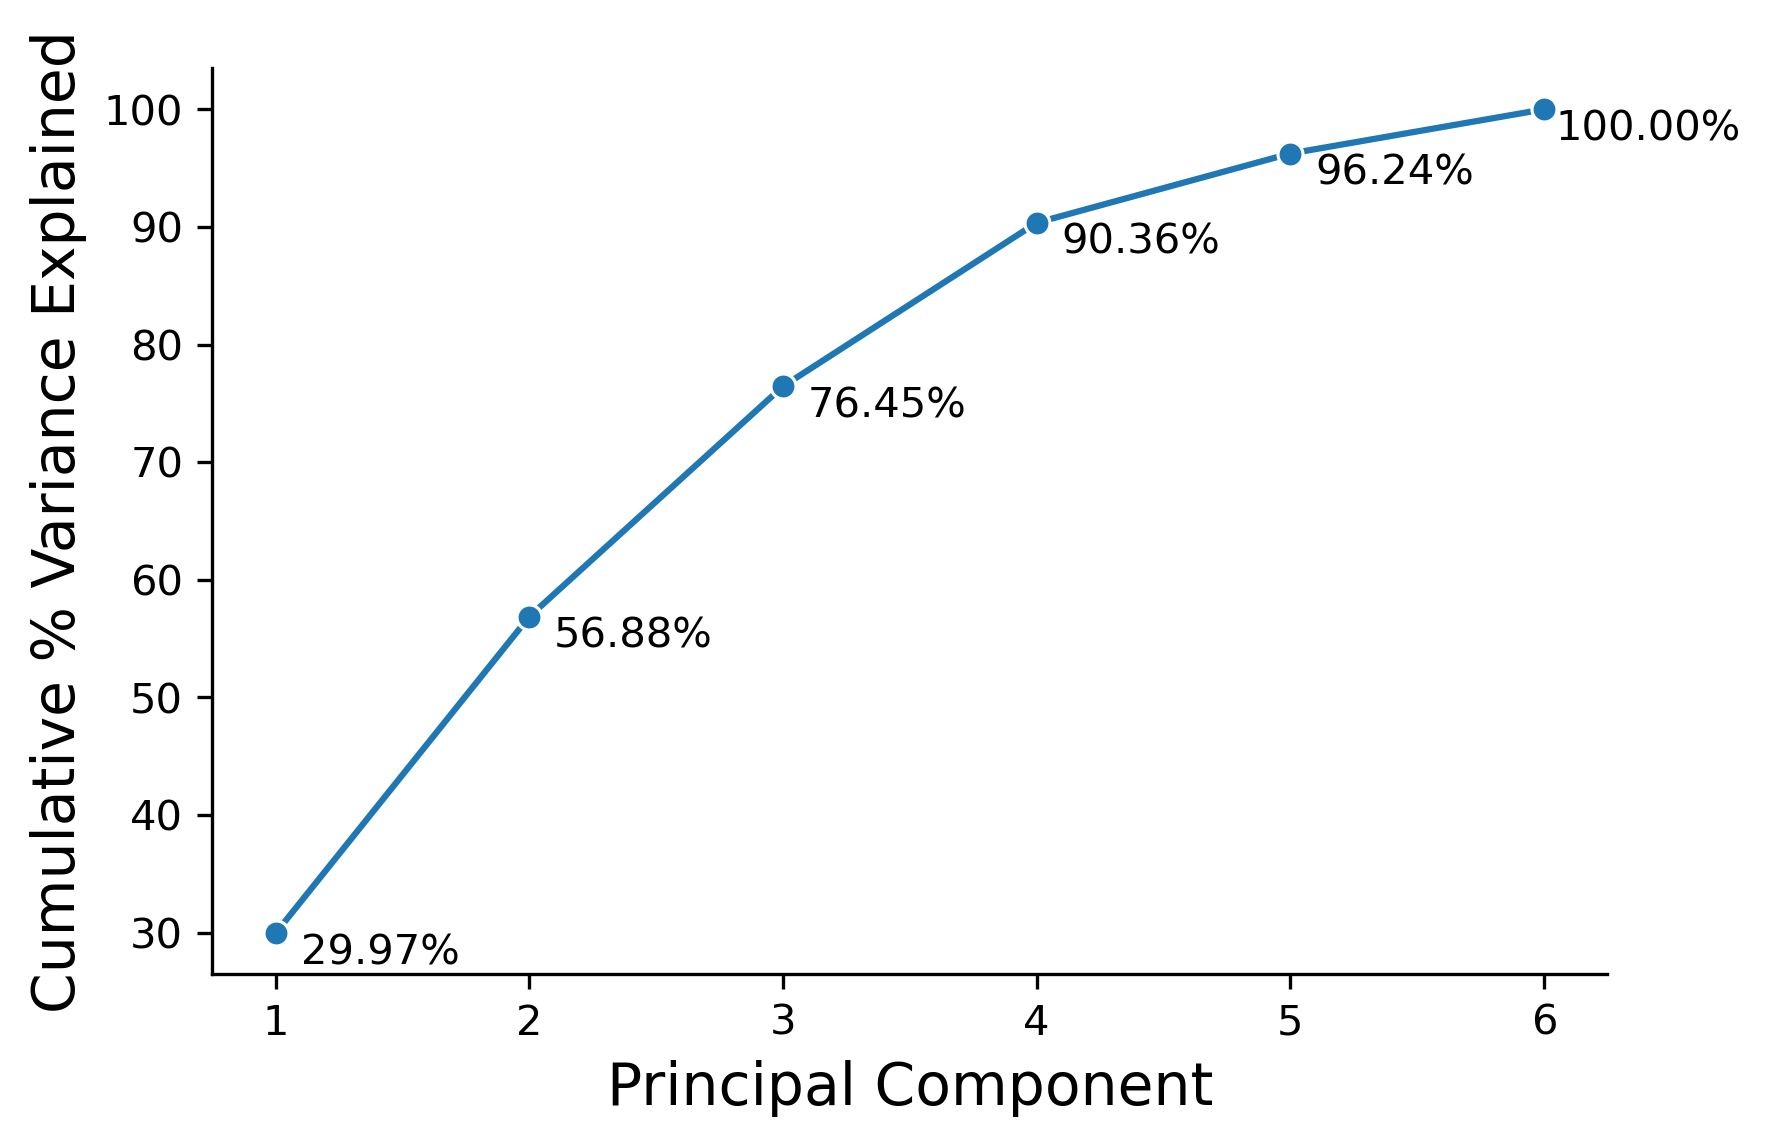

In [24]:
fig, ax = plt.subplots(1, 1)

x = np.arange(start=1, stop=7)
sns.lineplot(x=x, y=np.cumsum(var_explained), marker="o", ax=ax)
ax.set_xlabel("Principal Component", fontsize=14)
ax.set_ylabel("Cumulative % Variance Explained", fontsize=14)
#ax.set_yticklabels([f"{x}%" for x in ax.get_yticklabels()])

for x, y in zip(x, np.cumsum(var_explained)):
    ax.annotate(
        f"{y:.2f}%",
        (x, y),
        textcoords="offset points",
        xytext=(25, 0),
        ha="center",
        va="top"
    )

plt.show()

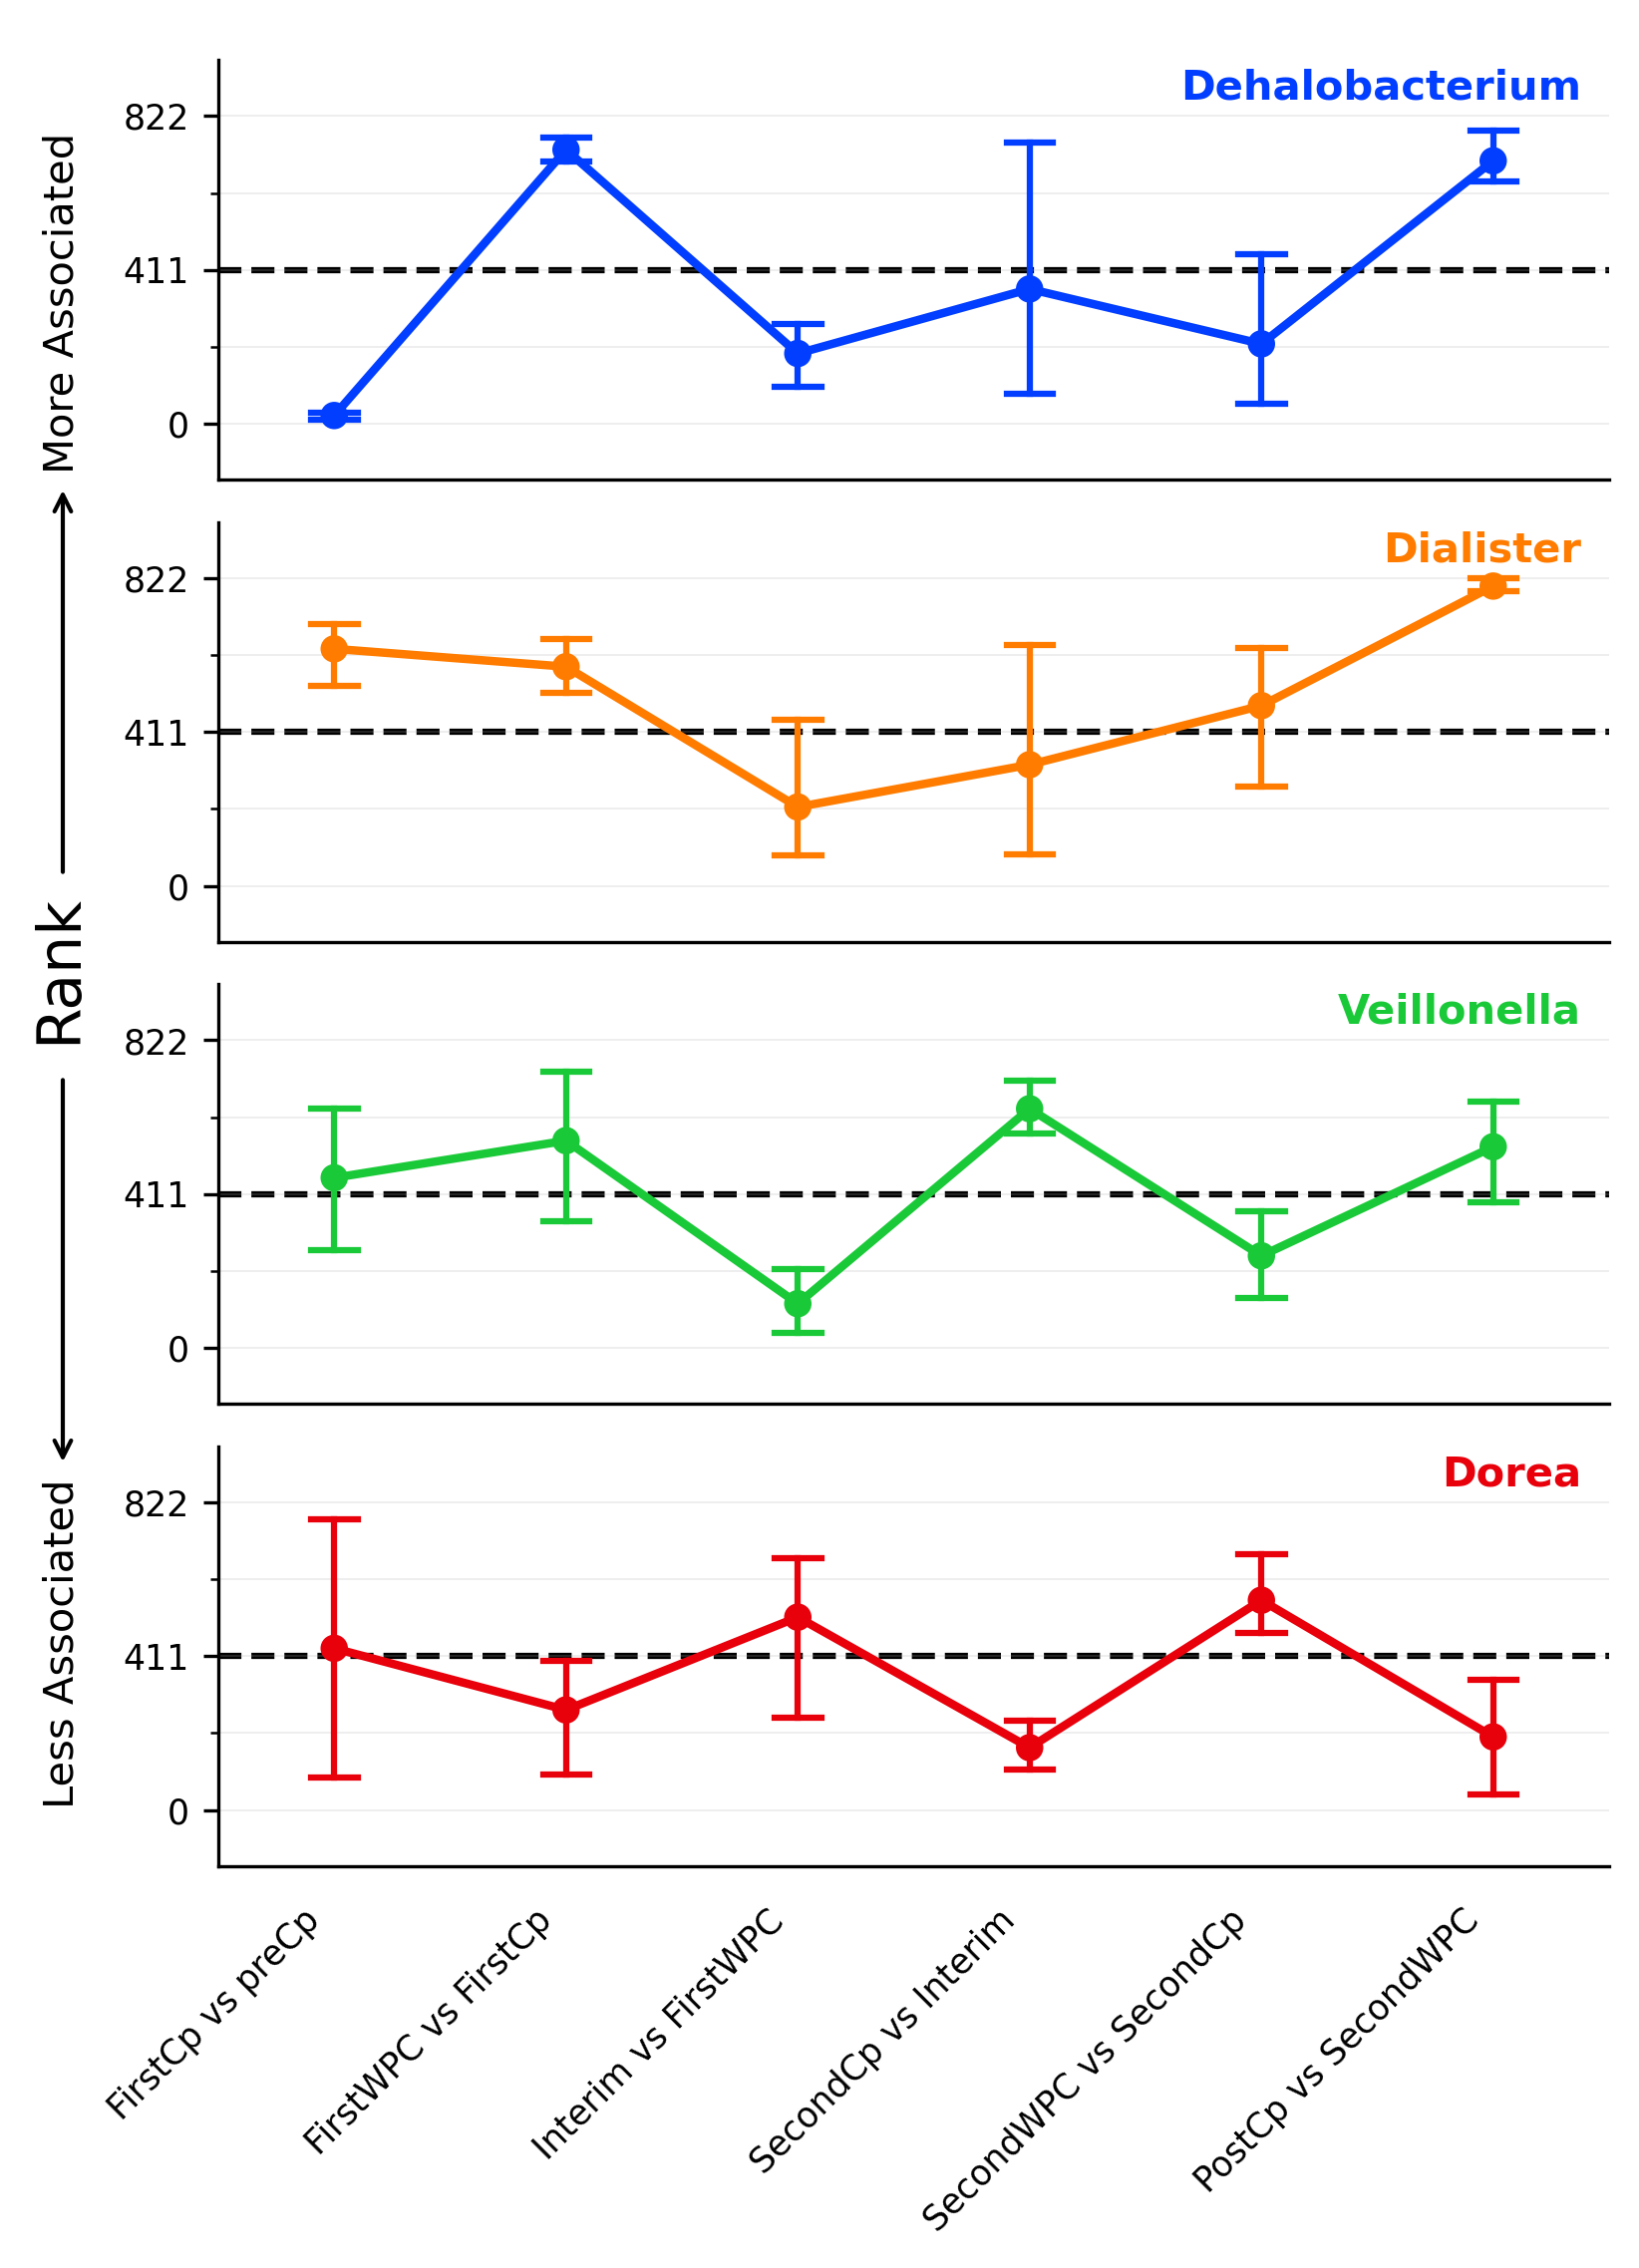

In [25]:
fig, axs = plt.subplots(len(genera_of_interest), 1, sharex=True,
                        figsize=(6, 8))
plt.subplots_adjust(hspace=0.1)

_rank_df = (
    summ_diff_cent
    .rank(ascending=False)
    .assign(Genus=feature_pcs_df["Genus"])
    .reset_index()
    .melt(id_vars=["Feature", "Genus"])
    .assign(Timepoint=lambda x: x["variable"].str.replace("_mean", "_"))
    .assign(Timepoint=lambda x: x["Timepoint"].str.replace("_", " "))
)

for ax, (genus, _df) in zip(axs, _rank_df.groupby("Genus")):
    sns.pointplot(
        data=_df,
        x="Timepoint",
        y="value",
        ax=ax,
        color=genus_pal[genus],
        capsize=0.2,
        errwidth=1.5,
        scale=0.75
    )
    ax.set_xlabel("")
    ax.set_ylim([0-150, summ_diff_cent.shape[0]+150])
    ax.axhline(summ_diff_cent.shape[0] // 2, color="black", ls="--",
               zorder=0)
    ax.text(
        x=0.98,
        y=0.98,
        s=genus,
        transform=ax.transAxes,
        ha="right",
        va="top",
        color=genus_pal[genus],
        weight="bold"
    )
    ax.tick_params("x", width=0)
    ax.tick_params("y", labelsize="small")
    ax.set_yticks(np.linspace(0, summ_diff_cent.shape[0], 3))
    ax.set_ylabel("")
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.grid(axis="y", which="both")

ax.set_xticklabels(
    _rank_df["Timepoint"].unique(),
    rotation=45,
    ha="right",
    fontsize="small"
)
fig.supylabel("Rank", fontsize="x-large")

args = {
    "clip_on": False,
    "xycoords": "figure fraction",
    "ha": "center",
    "rotation": 90,
}
plt.annotate(
    "More Associated",
    xy=(0.035, 0.58),
    xytext=(0.035, 0.75),
    va="bottom",
    arrowprops=dict(
        arrowstyle="<-"
    ),
    **args
)

plt.annotate(
    "Less Associated",
    xy=(0.035, 0.5),
    xytext=(0.035, 0.33),
    va="top",
    arrowprops=dict(
        arrowstyle="<-",
    ),
    **args
)

plt.show()

In [26]:
import biom

table = biom.load_table("../data/relman_abx/processed/processed_tbl.biom").to_dataframe(dense=True).T
table.shape

(141, 822)

In [27]:
md = pd.read_table("../data/relman_abx/processed/processed_md.tsv", sep="\t", index_col=0)
md["antibiotic"] = pd.Categorical(md["antibiotic"], categories=levels, ordered=True)
md.head()

,age,age_unit,altitude,anonymized_name,antibiotic,body_habitat,body_product,body_site,collection_timestamp,country,...,latitude,longitude,physical_specimen_location,physical_specimen_remaining,public,qiita_study_id,sample_type,scientific_name,sex,title
sample_name,,,,,,,,,,,,,,,,,,,,,
S494.E28,34,years,0,E28,Interim,UBERON:feces,UBERON:feces,UBERON:feces,11/11/05 0:00,GAZ:United States of America,...,37.42,-122.17,Stanford University,False,True,494,stool,Homo sapiens,female,Incomplete recovery and individualized respons...
S494.D32,54,years,0,D32,Interim,UBERON:feces,UBERON:feces,UBERON:feces,11/18/05 0:00,GAZ:United States of America,...,37.42,-122.17,Stanford University,False,True,494,stool,Homo sapiens,female,Incomplete recovery and individualized respons...
S494.D34,54,years,0,D34,Interim,UBERON:feces,UBERON:feces,UBERON:feces,11/26/05 0:00,GAZ:United States of America,...,37.42,-122.17,Stanford University,False,True,494,stool,Homo sapiens,female,Incomplete recovery and individualized respons...
S494.D36,54,years,0,D36,Interim,UBERON:feces,UBERON:feces,UBERON:feces,11/28/05 0:00,GAZ:United States of America,...,37.42,-122.17,Stanford University,False,True,494,stool,Homo sapiens,female,Incomplete recovery and individualized respons...
S494.D36.5n,54,years,0,D36.5n,Interim,UBERON:feces,UBERON:feces,UBERON:feces,11/28/05 0:00,GAZ:United States of America,...,37.42,-122.17,Stanford University,False,True,494,stool,Homo sapiens,female,Incomplete recovery and individualized respons...


In [28]:
def log_ratio(table, top_feats, bot_feats):
    num_sum = table.loc[:, top_feats].sum(axis=1)
    denom_sum = table.loc[:, bot_feats].sum(axis=1)
    lr_df = pd.concat([num_sum, denom_sum], axis=1)
    lr_df.columns = ["num", "denom"]
    lr_df = lr_df.dropna(how="all")
    lr_df = lr_df + 1
    lr_df["log_ratio"] = np.log(lr_df["num"]/lr_df["denom"]).to_frame()
    lr_df = lr_df.join(md)
    return lr_df

In [29]:
deseq2_dfs = []
deseq2_qvals = []
for diff in levels_diffs:    
    deseq2_res = pd.read_table(f"../results/relman_abx/deseq2/{diff}.tsv")
    deseq2_dfs.append(deseq2_res["log2FoldChange"].to_frame(name=diff))
    deseq2_qvals.append(deseq2_res["padj"].to_frame(name=diff + "_padj"))
    
deseq2_df = pd.concat(deseq2_dfs, axis=1)
deseq2_df.index.name = "Feature"

deseq2_df.head()

,FirstCp_vs_preCp,FirstWPC_vs_FirstCp,Interim_vs_FirstWPC,SecondCp_vs_Interim,SecondWPC_vs_SecondCp,PostCp_vs_SecondWPC
Feature,,,,,,
F358030,-1.240102,0.000000,0.172421,-1.473516,2.723742,-1.389274
F4306262,-0.028966,-0.647911,-0.480447,1.936007,-0.115533,1.289363
F3903651,-0.124914,-3.097728,2.570711,0.869724,-0.343713,0.615625
F4465746,-0.670813,0.916923,-0.842784,1.547856,-1.281132,-1.654746
F3943186,0.401887,0.120338,-0.313170,-0.011741,0.240457,-0.266757


In [30]:
deseq2_qval_df = pd.concat(deseq2_qvals, axis=1).replace({np.nan: 1})
deseq2_qval_df.head()

,FirstCp_vs_preCp_padj,FirstWPC_vs_FirstCp_padj,Interim_vs_FirstWPC_padj,SecondCp_vs_Interim_padj,SecondWPC_vs_SecondCp_padj,PostCp_vs_SecondWPC_padj
F358030,0.952890,1.000000,0.984640,1.000000,1.000000,0.883609
F4306262,0.984917,0.862194,0.879760,0.118717,1.000000,0.539609
F3903651,0.974613,0.008783,0.009614,0.412782,0.987855,0.769606
F4465746,0.952890,0.788054,0.806042,0.312357,0.592684,0.482692
F3943186,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
(deseq2_qval_df < 0.05).sum()

FirstCp_vs_preCp_padj          8
FirstWPC_vs_FirstCp_padj      14
Interim_vs_FirstWPC_padj      34
SecondCp_vs_Interim_padj       6
SecondWPC_vs_SecondCp_padj    13
PostCp_vs_SecondWPC_padj      17
dtype: int64

In [32]:
aldex2_res_full = pd.read_table("../results/relman_abx/aldex2_results.tsv", sep="\t", index_col=0)
aldex2_res = aldex2_res_full.filter(like="Estimate").filter(like="antibiotic")

aldex2_res.head()

,model.antibioticFirstCp Estimate,model.antibioticFirstWPC Estimate,model.antibioticInterim Estimate,model.antibioticPostCp Estimate,model.antibioticSecondCp Estimate,model.antibioticSecondWPC Estimate
F358030,-0.589441,0.108938,0.432698,0.315557,-0.980308,1.167657
F4306262,-0.348871,-1.226516,-0.992328,0.053139,2.123225,0.702417
F3903651,-0.661934,-4.090539,-0.559966,1.398219,0.942773,0.302861
F4465746,-1.673095,0.517485,-1.094283,-1.343585,-0.759719,-0.881431
F3943186,0.155886,0.538640,0.242880,0.205902,-0.007615,0.239256


In [33]:
aldex2_qval = aldex2_res_full.filter(like="BH").filter(like="antibiotic")
aldex2_qval.head()

,model.antibioticFirstCp Pr(>|t|).BH,model.antibioticFirstWPC Pr(>|t|).BH,model.antibioticInterim Pr(>|t|).BH,model.antibioticPostCp Pr(>|t|).BH,model.antibioticSecondCp Pr(>|t|).BH,model.antibioticSecondWPC Pr(>|t|).BH
F358030,0.993855,1.000000,1.0,1.0,0.999528,0.984711
F4306262,1.000000,1.000000,1.0,1.0,1.000000,1.000000
F3903651,1.000000,0.432057,1.0,1.0,1.000000,1.000000
F4465746,1.000000,1.000000,1.0,1.0,1.000000,1.000000
F3943186,1.000000,1.000000,1.0,1.0,1.000000,1.000000


In [34]:
(aldex2_qval < 0.05).sum()

model.antibioticFirstCp Pr(>|t|).BH      0
model.antibioticFirstWPC Pr(>|t|).BH     0
model.antibioticInterim Pr(>|t|).BH      0
model.antibioticPostCp Pr(>|t|).BH       0
model.antibioticSecondCp Pr(>|t|).BH     0
model.antibioticSecondWPC Pr(>|t|).BH    0
dtype: int64

In [35]:
ancombc_res_full = pd.read_table("../results/relman_abx/ancombc_results_beta.tsv", sep="\t", index_col=0)
ancombc_res = ancombc_res_full.filter(like="antibiotic")

ancombc_res.head()

,antibioticFirstCp,antibioticFirstWPC,antibioticInterim,antibioticPostCp,antibioticSecondCp,antibioticSecondWPC
F358030,-0.224736,0.066105,0.053513,0.027176,-0.252123,0.523310
F4306262,-0.073151,-0.797358,-0.689639,0.048388,1.378285,0.550487
F3903651,-0.430007,-1.897165,-0.389209,0.595767,0.531529,0.157638
F4465746,-0.641553,0.310423,-0.482090,-0.665142,-0.072495,-0.293538
F3943186,0.054870,0.149982,0.025526,0.023236,0.061602,0.083453


In [36]:
ancombc_qval = pd.read_table("../results/relman_abx/ancombc_results_qval.tsv", sep="\t", index_col=0)
ancombc_qval = ancombc_qval.filter(like="antibiotic")
ancombc_qval.head()

,antibioticFirstCp,antibioticFirstWPC,antibioticInterim,antibioticPostCp,antibioticSecondCp,antibioticSecondWPC
F358030,1.0,1.000000,1.0,1.0,1.0,1.0
F4306262,1.0,1.000000,1.0,1.0,1.0,1.0
F3903651,1.0,0.030655,1.0,1.0,1.0,1.0
F4465746,1.0,1.000000,1.0,1.0,1.0,1.0
F3943186,1.0,1.000000,1.0,1.0,1.0,1.0


In [37]:
(ancombc_qval < 0.05).sum()

antibioticFirstCp       1
antibioticFirstWPC     16
antibioticInterim       4
antibioticPostCp        9
antibioticSecondCp      5
antibioticSecondWPC     5
dtype: int64

In [38]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
level_regex = re.compile("(\w+)_vs_(\w+)")

_to_join = md[["antibiotic", "host_subject_id"]]
_to_join = _to_join.assign(abx_class=LabelEncoder().fit_transform(_to_join["antibiotic"]))
_subj_ohe = pd.DataFrame(
    OneHotEncoder().fit_transform(_to_join["host_subject_id"].values.reshape(-1, 1))
    .todense(),
    index=_to_join.index,
)
_to_join = pd.concat([_to_join, pd.DataFrame(_subj_ohe)], axis=1)
_to_join = _to_join.drop(columns=["antibiotic", "host_subject_id"])

def create_tool_predictor_dfs(n):
    feat_dict = defaultdict(dict)
    lr_df_dict = dict()

    for diff in levels_diffs:    
        deseq2_res = deseq2_df[diff].sort_values(ascending=False)
        top_feats_deseq2 = deseq2_res.head(n).index
        bot_feats_deseq2 = deseq2_res.tail(n).index
        deseq2_lr_df = log_ratio(table, top_feats_deseq2, bot_feats_deseq2)

        feat_dict[diff]["deseq2"] = {"top": set(top_feats_deseq2), "bot": set(bot_feats_deseq2)}

        _birdman_df = summ_diff_cent[f"{diff}_mean"].sort_values(ascending=False)
        top_feats_birdman = _birdman_df.head(n).index
        bot_feats_birdman = _birdman_df.tail(n).index
        birdman_lr_df = log_ratio(table, top_feats_birdman, bot_feats_birdman)

        feat_dict[diff]["birdman"] = {"top": set(top_feats_birdman), "bot": set(bot_feats_birdman)}
        lr_df_dict[diff] = {"deseq2": deseq2_lr_df, "birdman": birdman_lr_df}
    
    lr_df_dict_2 = dict()

    col_regex = re.compile("model\.antibiotic(\w*) Estimate")
    for col in aldex2_res.columns:
        level = col_regex.search(col).groups()[0]
        _df = aldex2_res[col].sort_values(ascending=False)
        top_feats = _df.head(n).index
        bot_feats = _df.tail(n).index
        feat_dict[level]["aldex2"] = {"top": set(top_feats), "bot": set(bot_feats)}
        _lr_df = log_ratio(table, top_feats, bot_feats)
        lr_df_dict_2[level] = {"aldex2": _lr_df}

    col_regex = re.compile("antibiotic(\w*)")
    for col in ancombc_res.columns:
        level = col_regex.search(col).groups()[0]
        _df = ancombc_res[col].sort_values(ascending=False)
        top_feats = _df.head(n).index
        bot_feats = _df.tail(n).index
        feat_dict[level]["ancombc"] = {"top": set(top_feats), "bot": set(bot_feats)}
        _lr_df = log_ratio(table, top_feats, bot_feats)
        lr_df_dict_2[level]["ancombc"] = _lr_df
        
    deseq2_predictor_dict = dict()
    birdman_predictor_dict = dict()
    aldex2_predictor_dict = dict()
    ancombc_predictor_dict = dict()
    random_predictor_dict = dict()

    for diff, tool_dict in lr_df_dict.items():
        level_1, level_2 = level_regex.search(diff).groups()
        deseq2_predictor_dict[diff] = tool_dict["deseq2"]["log_ratio"]
        birdman_predictor_dict[diff] = tool_dict["birdman"]["log_ratio"]
        
    for level, tool_dict in lr_df_dict_2.items():
        aldex2_predictor_dict[level] = tool_dict["aldex2"]["log_ratio"]
        ancombc_predictor_dict[level] = tool_dict["ancombc"]["log_ratio"]

    birdman_predictor_df = pd.DataFrame.from_dict(birdman_predictor_dict).join(_to_join)
    deseq2_predictor_df = pd.DataFrame.from_dict(deseq2_predictor_dict).join(_to_join)
    aldex2_predictor_df = pd.DataFrame.from_dict(aldex2_predictor_dict).join(_to_join)
    ancombc_predictor_df = pd.DataFrame.from_dict(ancombc_predictor_dict).join(_to_join)
    
    tool_dfs = {
        "birdman": birdman_predictor_df,
        "deseq2": deseq2_predictor_df,
        "aldex2": aldex2_predictor_df,
        "ancombc": ancombc_predictor_df,
    }
    
    return tool_dfs

In [39]:
from sklearn.ensemble import RandomForestClassifier
from skbio.stats.composition import clr

table_clr = pd.DataFrame(clr(table.values + 1), index=table.index, columns=table.columns)

In [40]:
tool_predictor_dfs = create_tool_predictor_dfs(40)

In [41]:
from sklearn.metrics import balanced_accuracy_score, make_scorer, log_loss
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

scorer = make_scorer(balanced_accuracy_score, adjusted=False)
scoring = {"balanced_accuracy": scorer, "f1_weighted": "f1_weighted"}

model = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000,
    fit_intercept=True,
    C=1
)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)

balanced_acc_dict = dict()
f1_dict = dict()

rf_model = RandomForestClassifier(random_state=63, n_estimators=100)
_df = table_clr.join(_to_join)
X = _df.drop(columns=["abx_class"]).values
y = _df["abx_class"].values
rf_scores = cross_validate(rf_model, X, y, scoring=scoring, cv=cv)
rf_acc = rf_scores["test_balanced_accuracy"]
rf_f1 = rf_scores["test_f1_weighted"]

print(f"Random Forest: Balanced Accuracy: {np.mean(rf_acc):.3f}, {np.std(rf_acc):.3f}")
print(f"Random Forest: Weighted F1: {np.mean(rf_f1):.3f}, {np.std(rf_f1):.3f}")
print()
balanced_acc_dict["rf"] = rf_acc
f1_dict["rf"] = rf_f1

for tool, df in tool_predictor_dfs.items():
    X = df.drop(columns=["abx_class"]).values
    y = df["abx_class"].values
    
    scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1)
    
    acc = scores["test_balanced_accuracy"]
    f1 = scores["test_f1_weighted"]
    
    balanced_acc_dict[tool] = acc
    f1_dict[tool] = f1

    print(f"{tool} Balanced Accuracy: {np.mean(acc):.3f}, {np.std(acc):.3f}")
    print(f"{tool} Weighted F1: {np.mean(f1):.3f}, {np.std(f1):.3f}")
    print()
    
balanced_acc_df = pd.DataFrame.from_dict(balanced_acc_dict).melt()
f1_df = pd.DataFrame.from_dict(f1_dict).melt()

Random Forest: Balanced Accuracy: 0.407, 0.098
Random Forest: Weighted F1: 0.429, 0.082

birdman Balanced Accuracy: 0.783, 0.084
birdman Weighted F1: 0.751, 0.079

deseq2 Balanced Accuracy: 0.536, 0.088
deseq2 Weighted F1: 0.486, 0.084

aldex2 Balanced Accuracy: 0.459, 0.092
aldex2 Weighted F1: 0.435, 0.070

ancombc Balanced Accuracy: 0.429, 0.097
ancombc Weighted F1: 0.408, 0.085



In [42]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [43]:
from collections import Counter

df = tool_predictor_dfs["birdman"]
X = df.drop(columns=["abx_class"]).values
y = df["abx_class"].values

fold_predictions = []
true_classes = Counter()

for train_idx, test_idx in cv.split(X, y):
    X_train = X[train_idx]
    y_train = y[train_idx]
    
    X_test = X[test_idx]
    y_test = y[test_idx]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mat = confusion_matrix(y_test, y_pred)  # true x predicted
    fold_predictions.append(mat)
    true_classes.update(Counter(y_test))
    
true_class_count = pd.Series(true_classes).sort_index()
true_class_count.index = levels

fold_predictions = np.stack(fold_predictions)
full_conf_mat = pd.DataFrame(
    fold_predictions.sum(axis=0),
    index=pd.Index(levels, name="True Time Interval"),
    columns=pd.Index(levels, name="Predicted Time Interval")
)
full_conf_mat

Predicted Time Interval,preCp,FirstCp,FirstWPC,Interim,SecondCp,SecondWPC,PostCp
True Time Interval,,,,,,,
preCp,139,0,19,0,0,0,12
FirstCp,0,51,7,5,0,7,0
FirstWPC,6,1,271,0,10,25,57
Interim,0,1,1,123,8,0,7
SecondCp,0,0,1,10,119,0,0
SecondWPC,13,8,13,0,0,158,18
PostCp,18,0,34,31,10,19,208


In [44]:
full_conf_mat_prop = full_conf_mat.divide(true_class_count, axis=0)
full_conf_mat_prop

Predicted Time Interval,preCp,FirstCp,FirstWPC,Interim,SecondCp,SecondWPC,PostCp
True Time Interval,,,,,,,
preCp,0.817647,0.000000,0.111765,0.000000,0.000000,0.000000,0.070588
FirstCp,0.000000,0.728571,0.100000,0.071429,0.000000,0.100000,0.000000
FirstWPC,0.016216,0.002703,0.732432,0.000000,0.027027,0.067568,0.154054
Interim,0.000000,0.007143,0.007143,0.878571,0.057143,0.000000,0.050000
SecondCp,0.000000,0.000000,0.007692,0.076923,0.915385,0.000000,0.000000
SecondWPC,0.061905,0.038095,0.061905,0.000000,0.000000,0.752381,0.085714
PostCp,0.056250,0.000000,0.106250,0.096875,0.031250,0.059375,0.650000


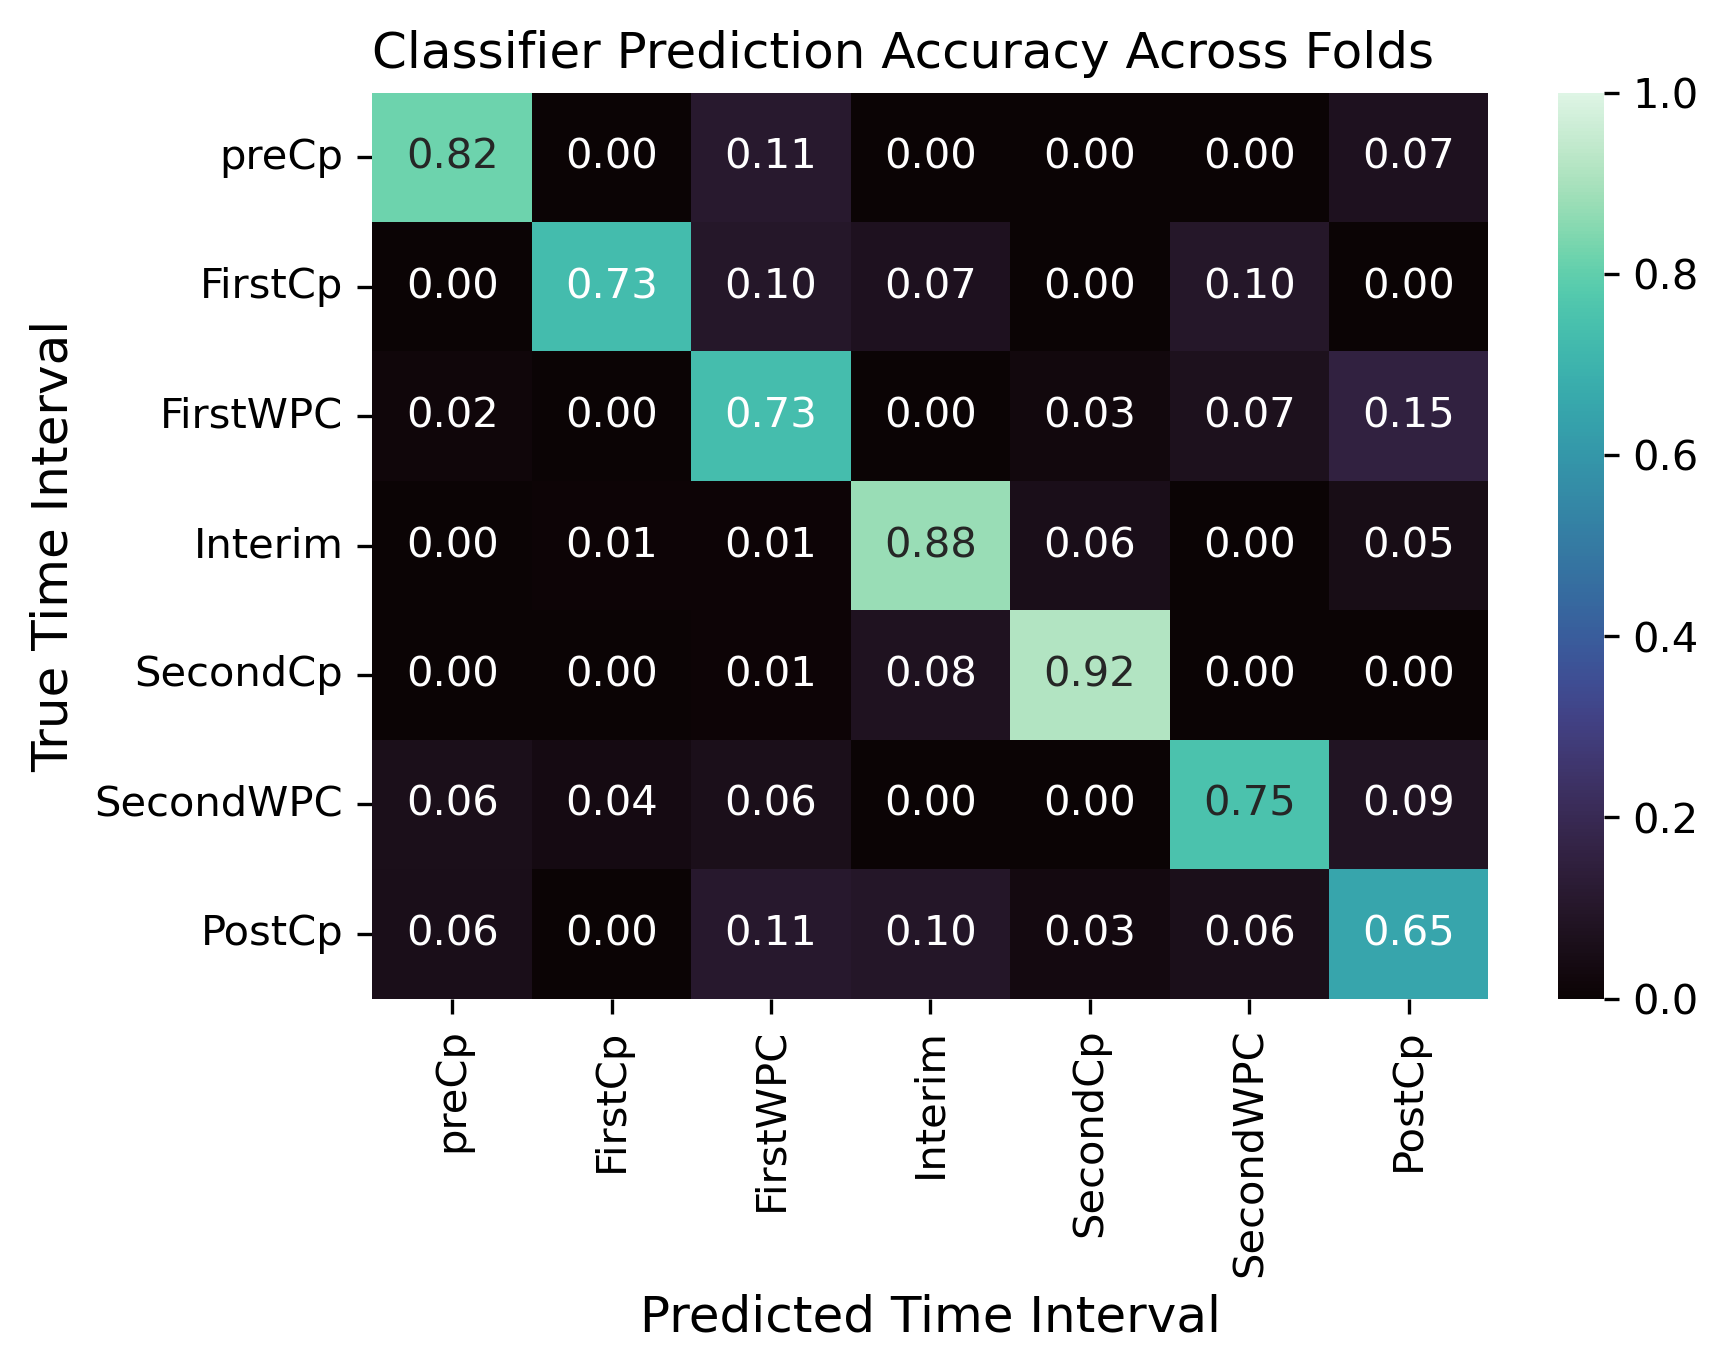

In [45]:
sns.heatmap(full_conf_mat_prop, annot=True, fmt=".2f", vmax=1, cmap="mako")
plt.title("Classifier Prediction Accuracy Across Folds", fontsize="large")
plt.savefig("../figures/relman_abx/acc_across_folds.pdf")
plt.show()

In [46]:
balanced_acc_df.groupby("variable").agg(["mean", "std"])

value          
              mean       std
variable                    
aldex2    0.459486  0.092437
ancombc   0.429435  0.097739
birdman   0.783432  0.084817
deseq2    0.535592  0.089349
rf        0.406793  0.099420

In [47]:
# Classifier error
balanced_acc_df.groupby("variable").mean().apply(lambda x: 1 - x["value"], axis=1)

variable
aldex2     0.540514
ancombc    0.570565
birdman    0.216568
deseq2     0.464408
rf         0.593207
dtype: float64

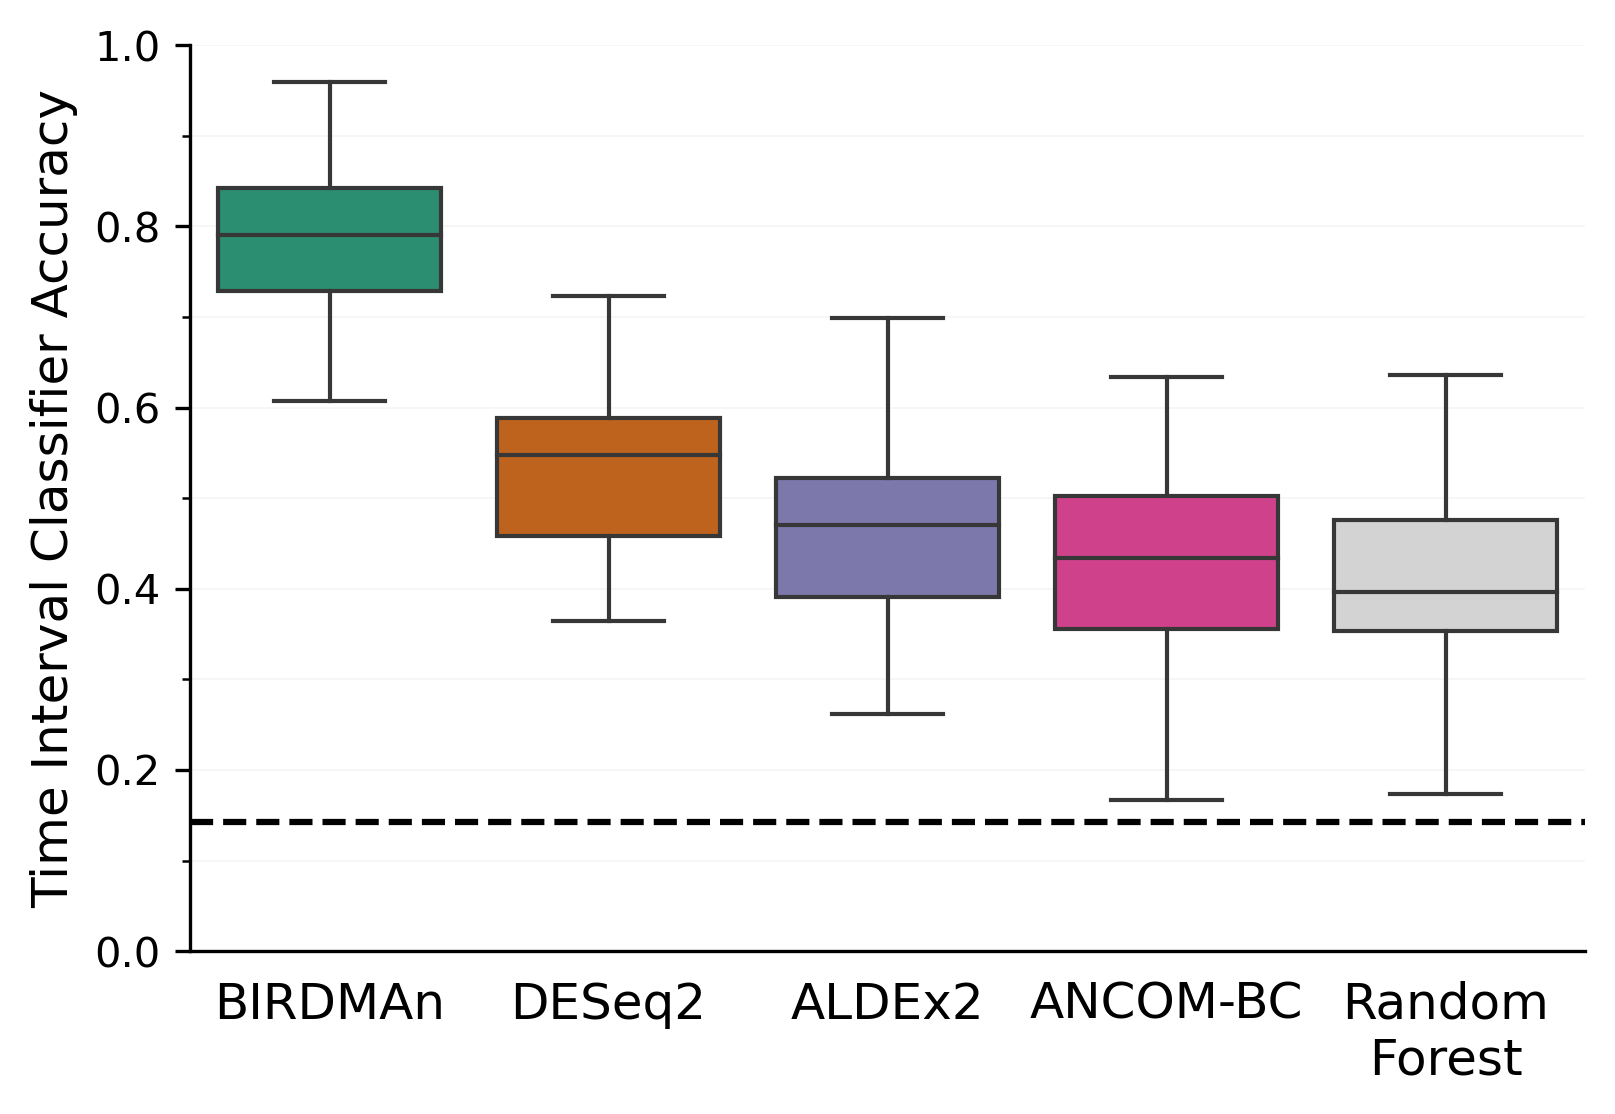

In [48]:
fig, ax = plt.subplots(1, 1)

new_tool_text_styling_dict = tool_text_styling_dict.copy()
new_tool_text_styling_dict["rf"] = "Random\nForest"

new_tool_palette = tool_palette.copy()
new_tool_palette["Random\nForest"] = "lightgray"

order = ["BIRDMAn", "DESeq2", "ALDEx2", "ANCOM-BC", "Random\nForest"]

_df_acc = (
    balanced_acc_df
    .assign(Tool=balanced_acc_df.variable.map(new_tool_text_styling_dict))
    .drop(columns=["variable"])
)
_df_f1 = (
    f1_df
    .assign(Tool=f1_df.variable.map(new_tool_text_styling_dict))
    .drop(columns=["variable"])
)

plot_args = {"data": _df_acc, "x": "Tool", "y": "value", "palette": new_tool_palette,
             "ax": ax}
sns.boxplot(
    **plot_args,
    linewidth=1,
    order=order,
    flierprops={"markersize": 2}
)

ax.set_xlabel("")

ax.set_axisbelow(True)
ax.tick_params("x", width=0)
ax.tick_params("x", labelsize="large")

ax.set_yticks(np.arange(0, 1.01, 0.2))
ax.set_ylim([0, 1])
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
ax.grid(axis="y", alpha=0.5, which="both")

ax.set_ylabel("Time Interval Classifier Accuracy", fontsize=12)
ax.axhline(1/len(levels), ls="--", color="k")

plt.savefig("../figures/relman_abx/acc_f1.pdf")
plt.show()

In [49]:
thresh_balanced_acc_dict = defaultdict(dict)
thresh_f1_dict = defaultdict(dict)

for n in np.arange(10, 101, 10):
    this_tool_predictor_dfs = create_tool_predictor_dfs(n)
    
    for tool, df in this_tool_predictor_dfs.items():
        X = df.drop(columns=["abx_class"]).values
        y = df["abx_class"].values

        scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1)

        acc = scores["test_balanced_accuracy"]
        f1 = scores["test_f1_weighted"]

        thresh_balanced_acc_dict[n][tool] = acc
        thresh_f1_dict[n][tool] = f1

In [50]:
thresh_balanced_acc_df = (
    pd.DataFrame.from_records(thresh_balanced_acc_dict)
    .apply(lambda x: x.explode())
    .reset_index()
    .melt(id_vars="index")
    .assign(value=lambda x: x["value"].astype(float))
    .assign(Tool=lambda x: x["index"].map(tool_text_styling_dict))
    .rename(columns={"variable": "N", "value": "Accuracy"})
)
thresh_balanced_acc_df.head()

,index,N,Accuracy,Tool
0,birdman,10,0.654762,BIRDMAn
1,birdman,10,0.773810,BIRDMAn
2,birdman,10,0.560544,BIRDMAn
3,birdman,10,0.452381,BIRDMAn
4,birdman,10,0.765306,BIRDMAn


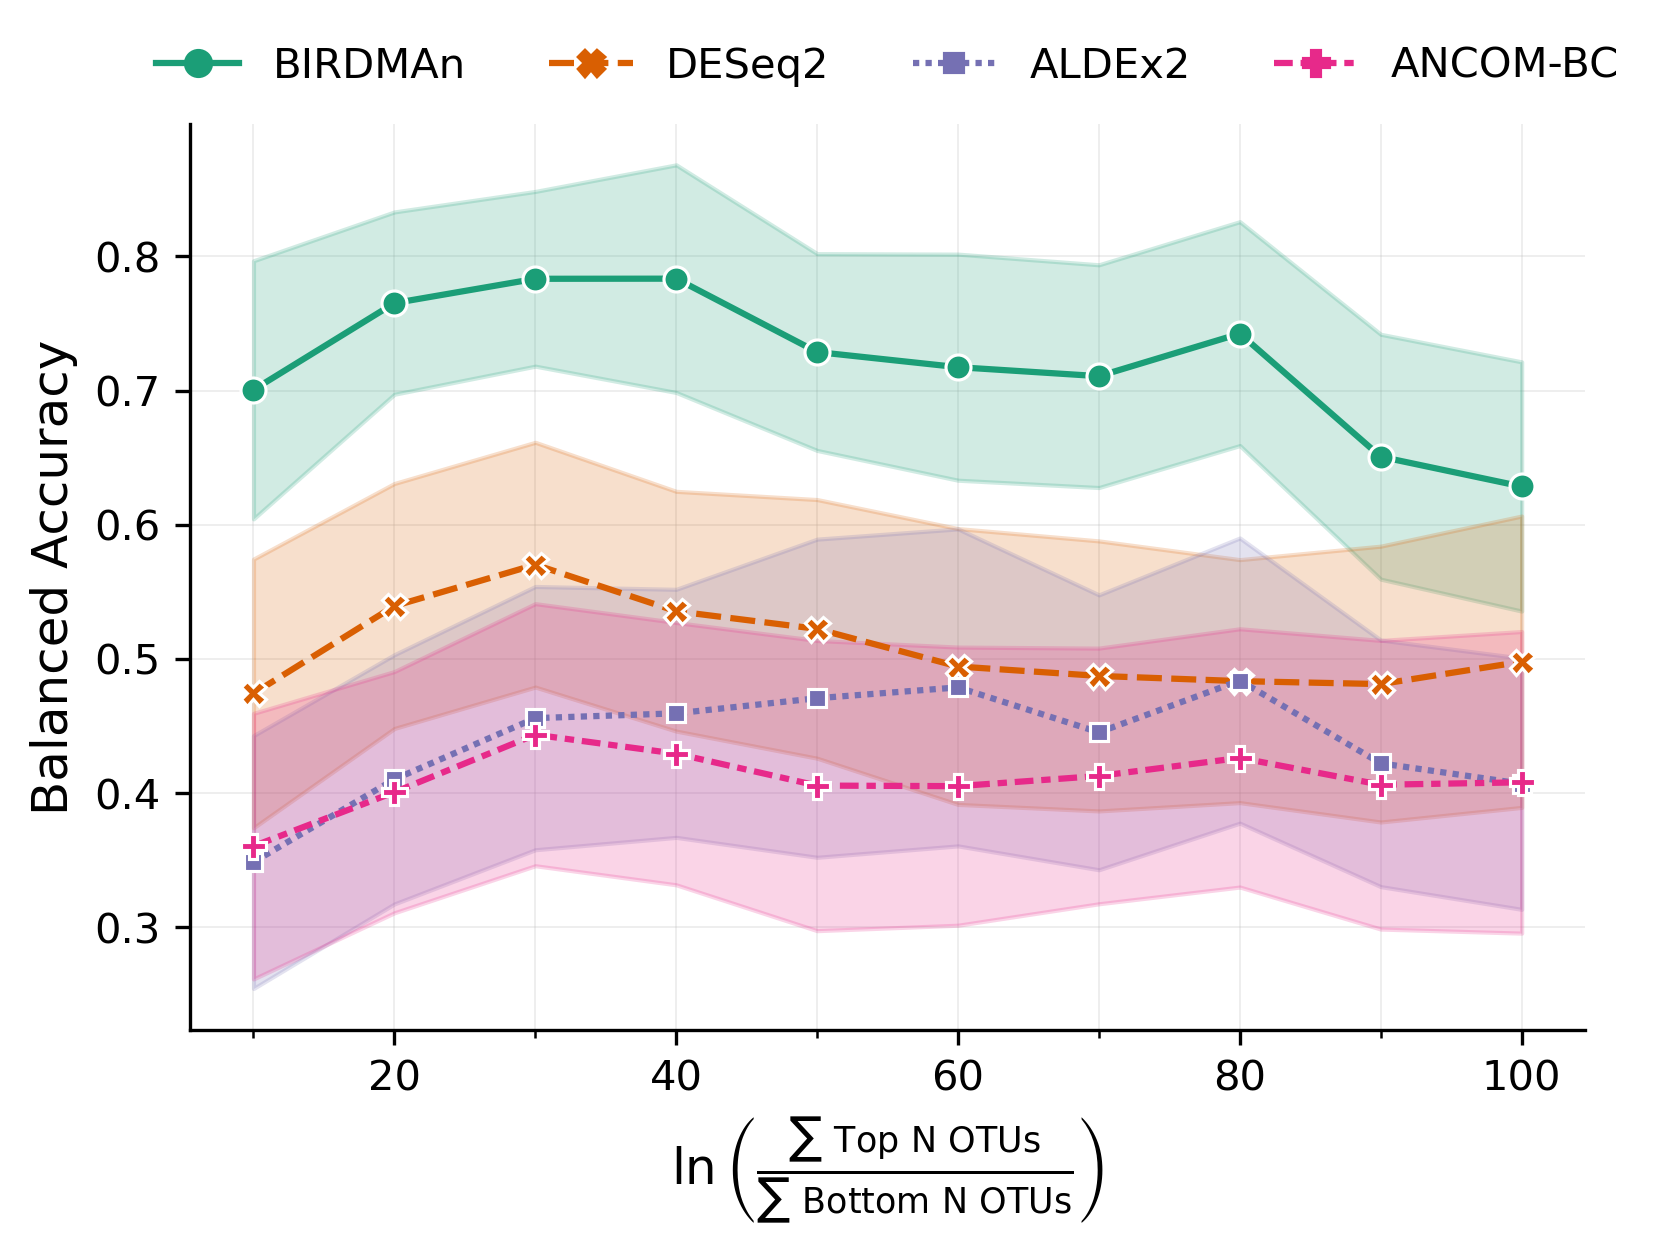

In [51]:
from matplotlib import ticker as mticker

fig, ax = plt.subplots(1, 1)

sns.lineplot(
    data=thresh_balanced_acc_df,
    x="N",
    y="Accuracy",
    hue="Tool",
    style="Tool",
    ci="sd",
    markers=True,
    palette=tool_palette,
    ax=ax
)
ax.set_xlabel(r"$\ln\left(\frac{\sum\ \mathrm{Top\ N\ OTUs}}{\sum\ \mathrm{Bottom\ N\ OTUs}}\right)$")
ax.set_ylabel("Balanced Accuracy")
ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))

#ax.legend(loc="upper left", bbox_to_anchor=[1, 1], edgecolor="black")
ax.legend(
    loc="lower center",
    bbox_to_anchor=[0.5, 1],
    frameon=False,
    fontsize="medium",
    ncol=4
)
ax.grid(which="both")

plt.savefig("../figures/relman_abx/thresh_acc.pdf")
plt.show()

In [52]:
from evident.stats import calculate_cohens_d

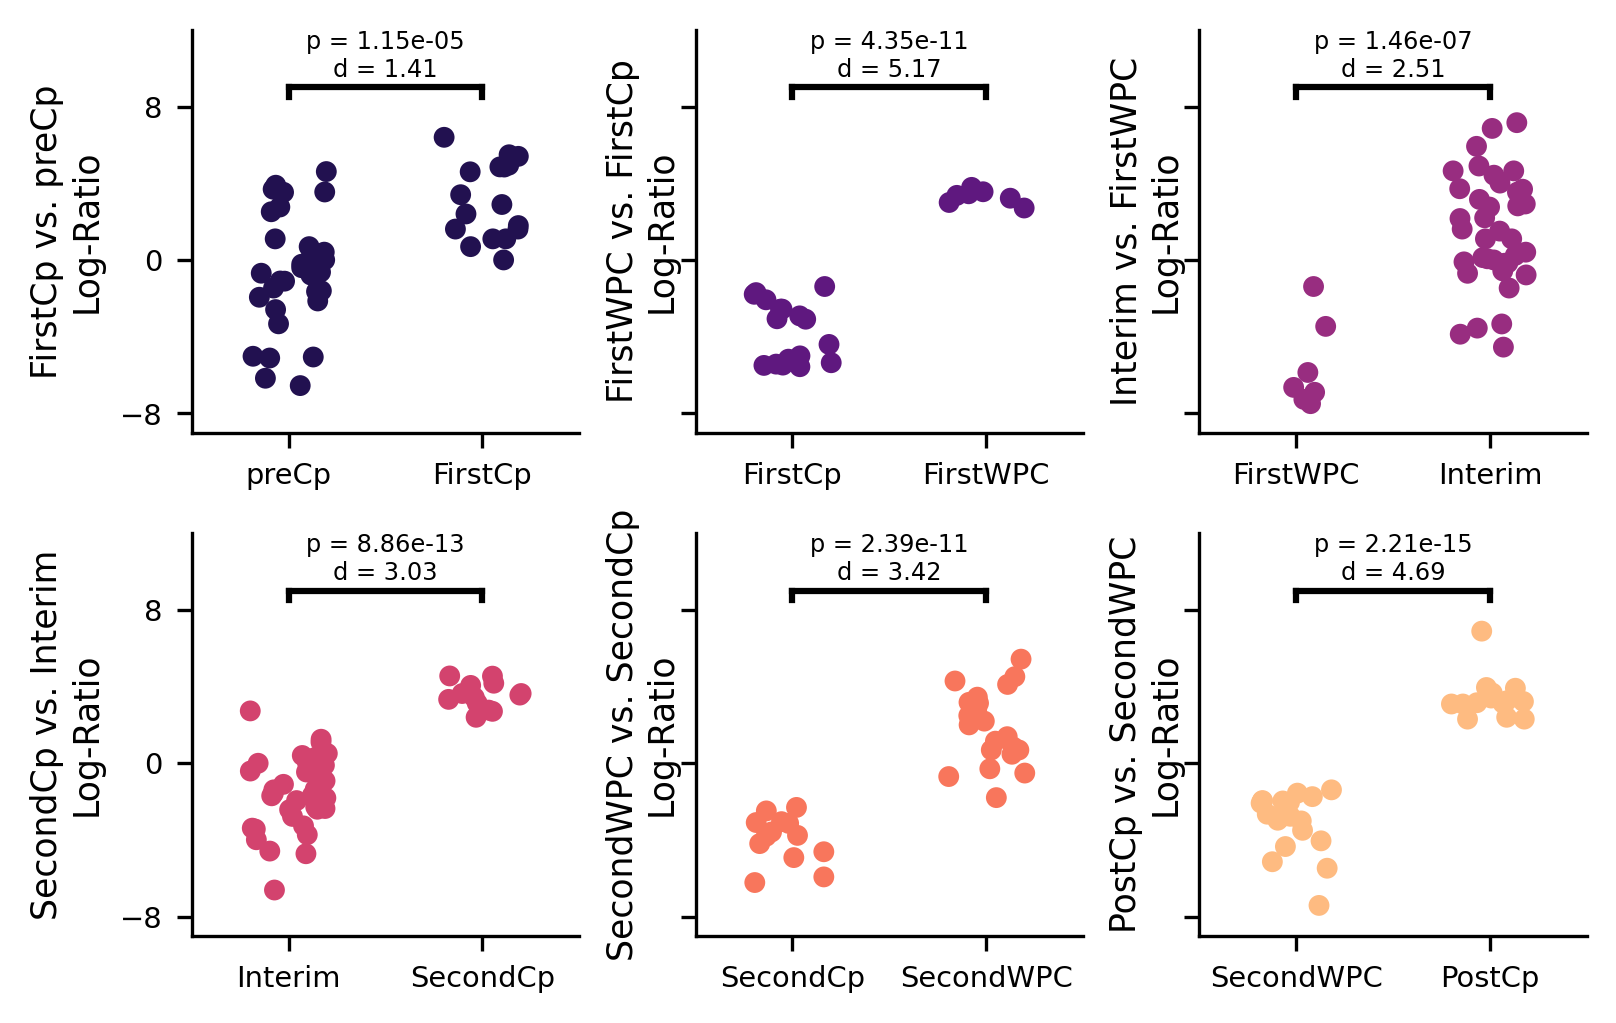

In [53]:
_df = tool_predictor_dfs["birdman"].filter(like="vs").join(md[["antibiotic"]])

fig, axs = plt.subplots(2, 3, sharey=True)
plt.subplots_adjust(wspace=0.3, hspace=0.25)

for ax, col in zip(axs.flatten(), _df.filter(like="vs").columns):
    grp1, grp2 = level_regex.search(col).groups()
    grp_df = _df[_df["antibiotic"].isin([grp1, grp2])].copy()
    grp_df["antibiotic"] = grp_df["antibiotic"].astype(str)
    
    sns.stripplot(
        data=grp_df,
        x="antibiotic",
        y=col,
        order=[grp2, grp1],
        color=palette[col + "_mean"],
        jitter=0.2,
        ax=ax
    )
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params("both", labelsize="x-small")
    
    grp1_vals = grp_df[grp_df["antibiotic"] == grp1][col]
    grp2_vals = grp_df[grp_df["antibiotic"] == grp2][col]
    t, p = ss.ttest_ind(grp1_vals, grp2_vals, alternative="greater")
    d = calculate_cohens_d(grp1_vals, grp2_vals)
    
    #ylab = fr"$\ln(\frac{{\mathrm{{{grp1}}}}}{{\mathrm{{{grp2}}}}}) + K$"
    ylab = f"{grp1} vs. {grp2}\nLog-Ratio"
    ax.set_ylabel(ylab, fontsize="small")
    ax.set_ylim([-9, 12])
    ax.yaxis.set_major_locator(mticker.MaxNLocator(3))
    ax.set_xlim([-0.5, 1.5])
    
    ax.plot([0, 1], [9, 9], color="k")
    ax.plot([0, 0], [8.5, 9], color="k")
    ax.plot([1, 1], [8.5, 9], color="k")
    ax.text(
        x=0.5,
        y=9.3,
        s=f"p = {p:.2e}\nd = {d:.2f}",
        va="bottom",
        ha="center",
        fontsize="xx-small"
    )

plt.savefig("../figures/relman_abx/contrast_comparisons_ttest.pdf")
plt.show()

# BugBase

In [54]:
import pathlib

bugbase_path = pathlib.Path("../results/relman_abx/bugbase/")

In [55]:
contrib_otu_path = bugbase_path / "otu_contributions" / "contributing_otus.txt"
contrib_otu = pd.read_table(contrib_otu_path, index_col=0)
contrib_otu.index = [f"F{x}" for x in contrib_otu.index]
contrib_otu.head()

,Aerobic,Anaerobic,Contains_Mobile_Elements,Facultatively_Anaerobic,Forms_Biofilms,Gram_Negative,Gram_Positive,Potentially_Pathogenic,Stress_Tolerant
F358030,False,False,True,False,False,False,True,False,True
F4306262,True,False,True,False,True,True,False,False,True
F3903651,False,True,True,False,False,False,True,True,True
F4465746,False,True,True,False,False,False,True,True,True
F3943186,False,True,True,False,False,False,True,False,True


In [56]:
gram_status = contrib_otu.filter(like="Gram").join(summ_diff_cent)
gram_status["Gram_Status"] = gram_status["Gram_Positive"].map({True: "Positive", False: "Negative"})
gram_status = gram_status.drop(columns=["Gram_Positive", "Gram_Negative"])
gram_status["Genus"] = [genus_map[x] for x in gram_status.index]

In [57]:
gram_map = gram_status["Gram_Status"].to_dict()

In [58]:
gram_status.groupby("Gram_Status").mean()

,FirstCp_vs_preCp_mean,FirstWPC_vs_FirstCp_mean,Interim_vs_FirstWPC_mean,SecondCp_vs_Interim_mean,SecondWPC_vs_SecondCp_mean,PostCp_vs_SecondWPC_mean
Gram_Status,,,,,,
Negative,-0.459116,-0.142670,0.255395,-0.149673,0.132827,0.119837
Positive,0.103318,0.032106,-0.057473,0.033682,-0.029891,-0.026968


In [59]:
import xarray as xr

beta_var = xr.open_dataset("../results/relman_abx/beta_var.nc")
beta_var = beta_var.stack(sample=["chain", "draw"])

In [60]:
abx_contrast_dict = dict(zip(beta_var.coords["covariate"].values, levels_diffs))
abx_contrast_dict

{"C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.preCp]": 'FirstCp_vs_preCp',
 "C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.FirstCp]": 'FirstWPC_vs_FirstCp',
 "C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.FirstWPC]": 'Interim_vs_FirstWPC',
 "C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.Interim]": 'SecondCp_vs_Interim',
 "C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.SecondCp]": 'SecondWPC_vs_SecondCp',
 "C(antibiotic, Diff, levels=['preCp', 'FirstCp', 'FirstWPC', 'Interim', 'SecondCp', 'SecondWPC', 'PostCp'])[D.SecondWPC]": 'PostCp_vs_SecondWPC'}

In [61]:
gram_pos_features = gram_status[gram_status["Gram_Status"] == "Positive"].index
gram_neg_features = gram_status[gram_status["Gram_Status"] == "Negative"].index

In [62]:
per_draw_gp = beta_var.sel({"feature": gram_pos_features}).mean(["feature"])
per_draw_gn = beta_var.sel({"feature": gram_neg_features}).mean(["feature"])

In [63]:
gram_neg_df = (
    (per_draw_gn - per_draw_gp.mean("sample"))
    .to_dataframe()
    .reset_index()
    .assign(gram_status="Negative")
    .assign(covariate=lambda x: x["covariate"].map(abx_contrast_dict))
)

gram_pos_df = (
    (per_draw_gp - per_draw_gp.mean("sample"))
    .to_dataframe()
    .reset_index()
    .assign(gram_status="Positive")
    .assign(covariate=lambda x: x["covariate"].map(abx_contrast_dict))
)

gram_draw_df = pd.concat([gram_neg_df, gram_pos_df]).reset_index()
gram_draw_df["index"] = gram_draw_df["chain"] * 500 + gram_draw_df["draw"]
gram_draw_df.head()

,index,covariate,chain,draw,beta_var,gram_status
0,0,FirstCp_vs_preCp,0,0,-0.366891,Negative
1,1,FirstCp_vs_preCp,0,1,-0.522831,Negative
2,2,FirstCp_vs_preCp,0,2,-0.787070,Negative
3,3,FirstCp_vs_preCp,0,3,-0.357515,Negative
4,4,FirstCp_vs_preCp,0,4,-0.908950,Negative


In [64]:
gram_draw_ci = (
    gram_draw_df
    .groupby(["gram_status", "covariate"])
    .quantile([0.05, 0.5, 0.95])
    .reset_index()
    .rename(columns={"level_2": "quantile"})
    .drop(columns=["index", "chain", "draw"])
)
gram_draw_ci.head()

,gram_status,covariate,quantile,beta_var
0,Negative,FirstCp_vs_preCp,0.05,-0.904424
1,Negative,FirstCp_vs_preCp,0.50,-0.564018
2,Negative,FirstCp_vs_preCp,0.95,-0.230219
3,Negative,FirstWPC_vs_FirstCp,0.05,-0.644622
4,Negative,FirstWPC_vs_FirstCp,0.50,-0.175925


In [65]:
gram_comp_df = (
    (per_draw_gn - per_draw_gp)
    .to_dataframe()
    .reset_index()
    .assign(sample=lambda x: x["chain"]*500 + x["draw"])
    .assign(covariate=lambda x: x["covariate"].map(abx_contrast_dict))
)
gram_comp_df

,covariate,chain,draw,beta_var,sample
0,FirstCp_vs_preCp,0,0,-0.306891,0
1,FirstCp_vs_preCp,0,1,-0.246911,1
2,FirstCp_vs_preCp,0,2,-0.727533,2
3,FirstCp_vs_preCp,0,3,-0.346557,3
4,FirstCp_vs_preCp,0,4,-0.976087,4
...,...,...,...,...,...
11995,PostCp_vs_SecondWPC,3,495,0.246229,1995
11996,PostCp_vs_SecondWPC,3,496,0.352920,1996
11997,PostCp_vs_SecondWPC,3,497,0.537428,1997
11998,PostCp_vs_SecondWPC,3,498,0.116638,1998


In [66]:
gram_comp_draw_ci = (
    gram_comp_df
    .groupby("covariate")
    .quantile([0.05, 0.5, 0.95])
    .reset_index()
    .rename(columns={"level_1": "quantile"})
    .drop(columns=["chain", "draw", "sample"])
)
gram_comp_draw_ci.head()

,covariate,quantile,beta_var
0,FirstCp_vs_preCp,0.05,-0.948497
1,FirstCp_vs_preCp,0.50,-0.555537
2,FirstCp_vs_preCp,0.95,-0.184349
3,FirstWPC_vs_FirstCp,0.05,-0.715858
4,FirstWPC_vs_FirstCp,0.50,-0.174709


In [67]:
gram_comp_lr_df = log_ratio(table, gram_neg_features, gram_pos_features)
gram_comp_lr_df.head()

,num,denom,log_ratio,age,age_unit,altitude,anonymized_name,antibiotic,body_habitat,body_product,...,latitude,longitude,physical_specimen_location,physical_specimen_remaining,public,qiita_study_id,sample_type,scientific_name,sex,title
S494.E28,6143.0,6590.0,-0.070240,34,years,0,E28,Interim,UBERON:feces,UBERON:feces,...,37.42,-122.17,Stanford University,False,True,494,stool,Homo sapiens,female,Incomplete recovery and individualized respons...
S494.D32,7852.0,7409.0,0.058073,54,years,0,D32,Interim,UBERON:feces,UBERON:feces,...,37.42,-122.17,Stanford University,False,True,494,stool,Homo sapiens,female,Incomplete recovery and individualized respons...
S494.D34,7299.0,5599.0,0.265149,54,years,0,D34,Interim,UBERON:feces,UBERON:feces,...,37.42,-122.17,Stanford University,False,True,494,stool,Homo sapiens,female,Incomplete recovery and individualized respons...
S494.D36,8445.0,5324.0,0.461350,54,years,0,D36,Interim,UBERON:feces,UBERON:feces,...,37.42,-122.17,Stanford University,False,True,494,stool,Homo sapiens,female,Incomplete recovery and individualized respons...
S494.D36.5n,8012.0,5841.0,0.316038,54,years,0,D36.5n,Interim,UBERON:feces,UBERON:feces,...,37.42,-122.17,Stanford University,False,True,494,stool,Homo sapiens,female,Incomplete recovery and individualized respons...


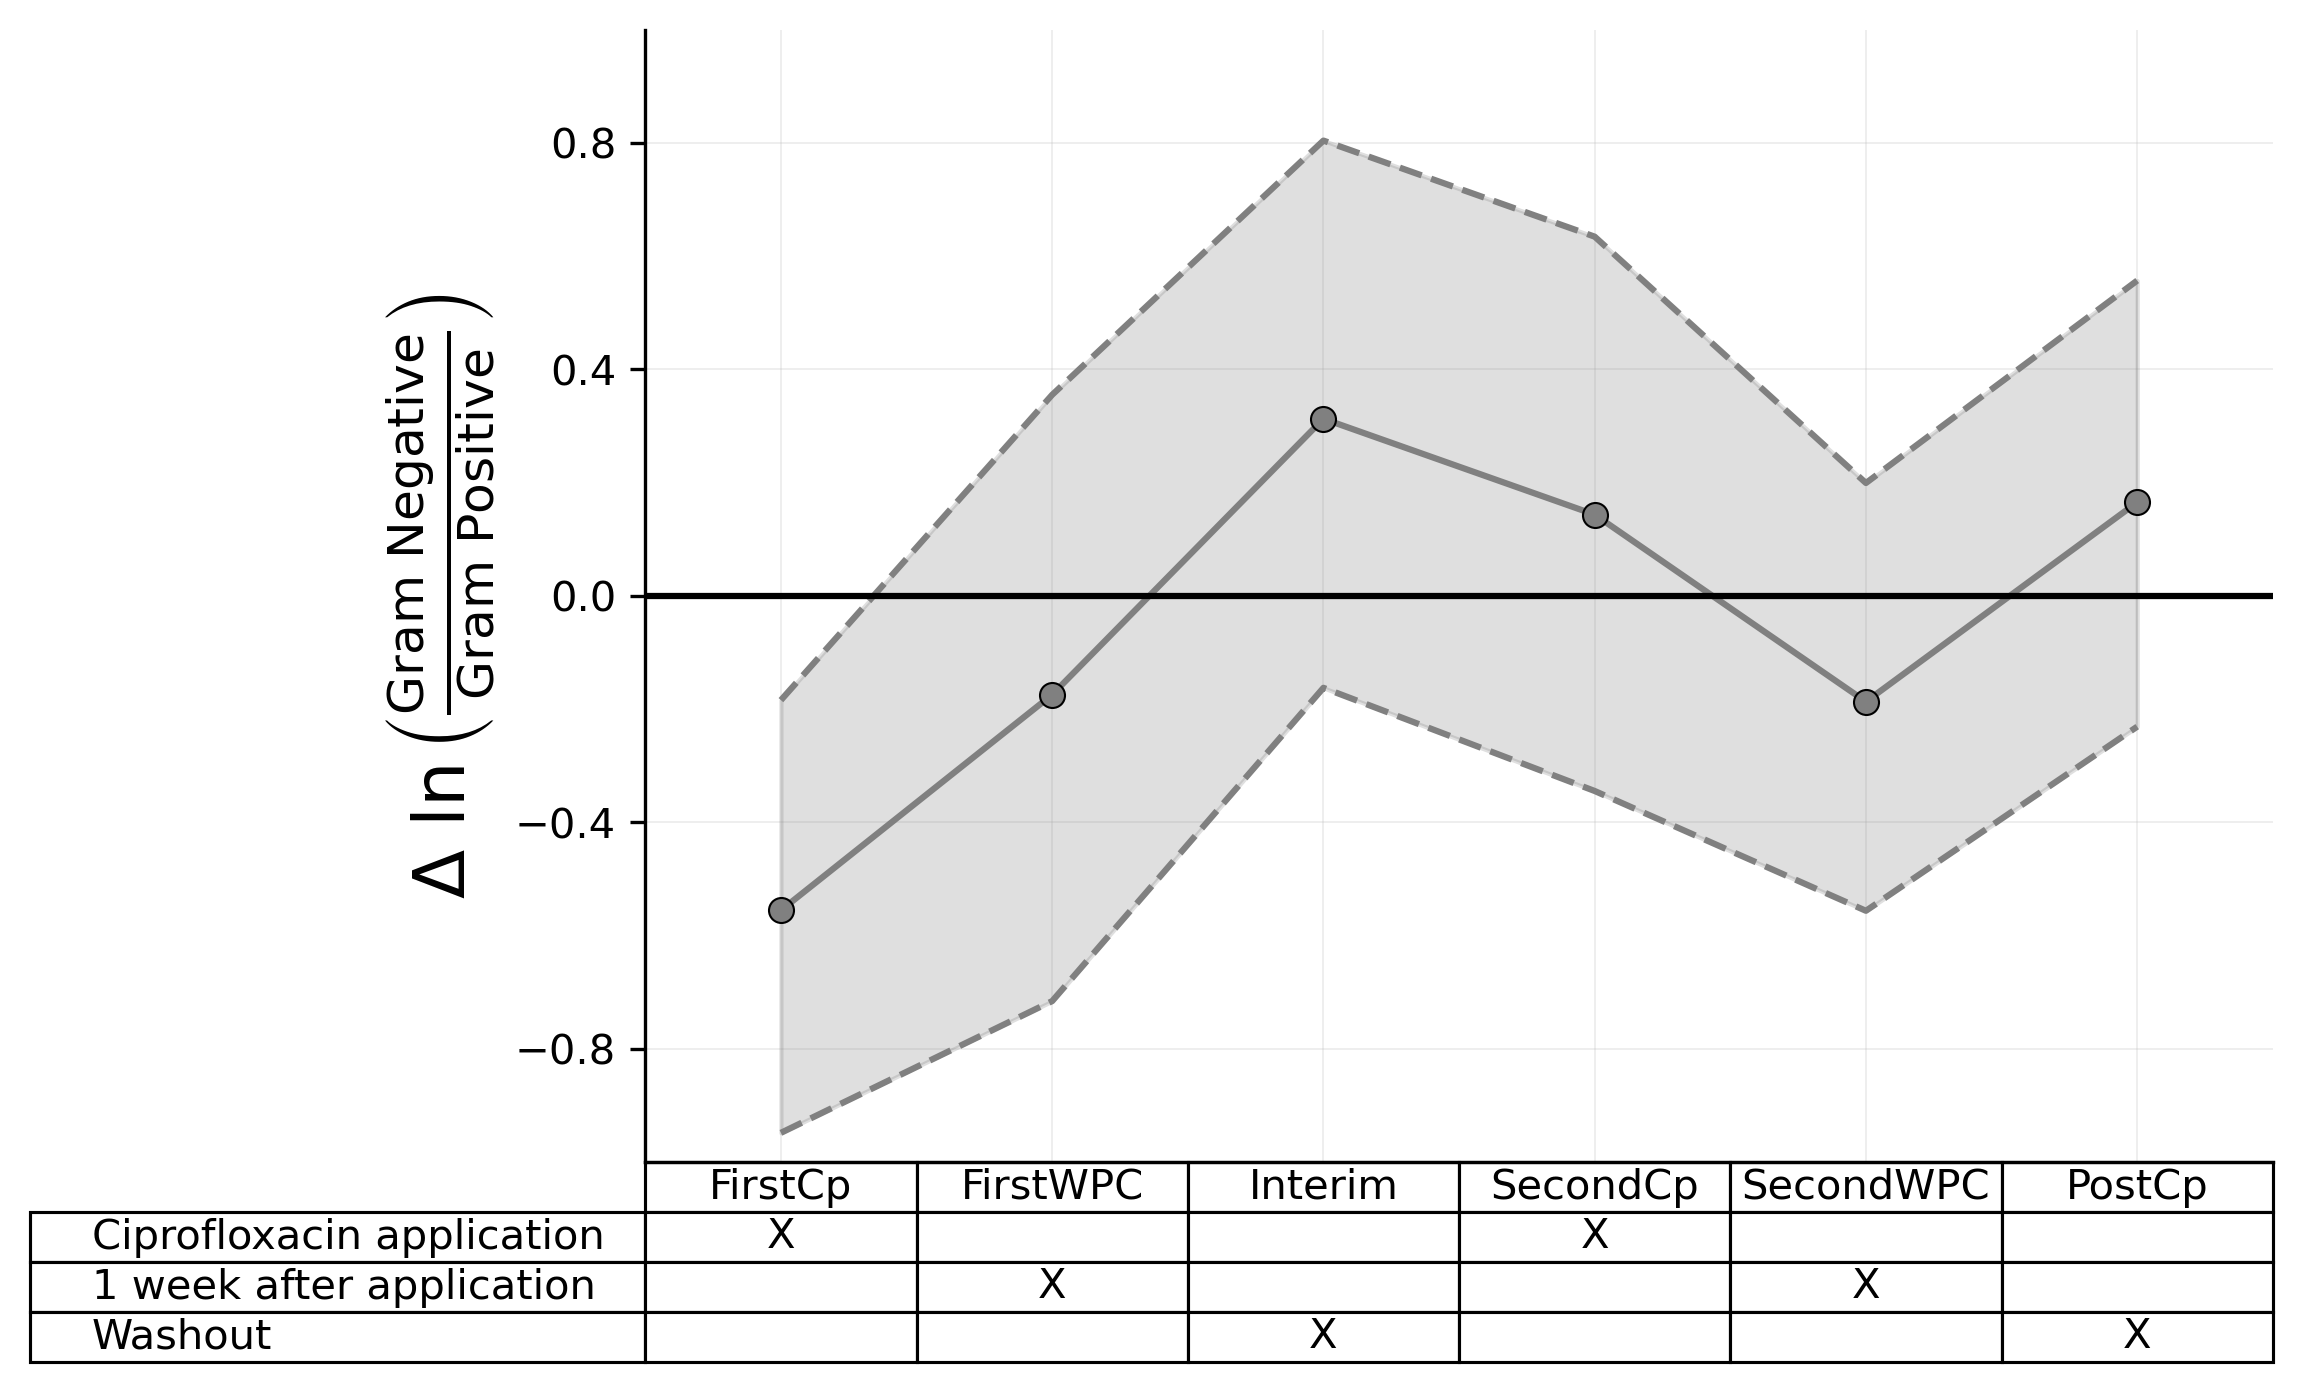

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

_lower = gram_comp_draw_ci.query("quantile == 0.05")
_upper = gram_comp_draw_ci.query("quantile == 0.95")
_mid = gram_comp_draw_ci.query("quantile == 0.5")

ax.fill_between(
    np.arange(6),
    _lower["beta_var"],
    _upper["beta_var"],
    color="gray",
    alpha=0.25

)

ax.plot(
    np.arange(6),
    _mid["beta_var"],
    markeredgecolor="black",
    markeredgewidth=0.5,
    color="gray",
    marker="o"
)
ax.plot(
    np.arange(6),
    _upper["beta_var"],
    color="gray",
    zorder=1,
    ls="--"
)
ax.plot(
    np.arange(6),
    _lower["beta_var"],
    color="gray",
    zorder=1,
    ls="--"
)
    
ax.axhline(0, c="k")

ax.set_ylim([-1, 1])
ax.set_xlim([-0.5, 5.5])
#ax.set_xticks(np.arange(-1, 6))
ax.yaxis.set_major_locator(mticker.MaxNLocator(5))
#ax.set_xticklabels(levels[1:], rotation=45, ha="right")
ax.grid()
ax.tick_params("x", width=0)

ax.set_ylabel(r"$\Delta\ \ln\left(\frac{\mathrm{Gram\ Negative}}{\mathrm{Gram\ Positive}}\right)$",
              fontsize="xx-large")
#ax.set_xlabel("Timepoint")
ax.set_xticklabels([])

# FirstCp, FirstWPC, Interm, SecondCp, SecondWPC, postCp
abx_table = [
    ["X", "", "", "X", "", ""],  # ABX application
    ["", "X", "", "", "X", ""],  # 1 Week after ABX
    ["", "", "X", "", "", "X"],  # Interim,
]
rows = [
    "Ciprofloxacin application",
    "1 week after application",
    "Washout",
]

the_table = ax.table(
    abx_table,
    rowLabels=rows,
    colLabels=[x for x in levels[1:]],
    cellLoc="center",
)

the_table.auto_set_font_size(False)

for cell_id, cell in the_table._cells.items():
    cell.set_linewidth(0.75)
    cell._text.set_fontsize(10)

plt.savefig("../figures/relman_abx/gram_trajectory_single.pdf")
plt.show()

In [69]:
tbl = biom.load_table("../data/relman_abx/processed/processed_tbl.biom")

from gemelli.rpca import rpca

ord_res, _ = rpca(tbl)
samp_axes = ord_res.samples.join(md, how="inner")
samp_axes = samp_axes.rename(columns={
    "host_subject_id": "Subject",
    "antibiotic": "Time Interval"
})
samp_axes.head()

/home/grahman/miniconda3/envs/birdman-analyses-final/lib/python3.8/site-packages/gemelli/preprocessing.py:418: RuntimeWarning: divide by zero encountered in log
  mat = np.log(matrix_closure(mat))


,PC1,PC2,PC3,age,age_unit,altitude,anonymized_name,Time Interval,body_habitat,body_product,...,latitude,longitude,physical_specimen_location,physical_specimen_remaining,public,qiita_study_id,sample_type,scientific_name,sex,title
S494.E28,-0.009375,0.000583,0.091463,34,years,0,E28,Interim,UBERON:feces,UBERON:feces,...,37.42,-122.17,Stanford University,False,True,494,stool,Homo sapiens,female,Incomplete recovery and individualized respons...
S494.D32,-0.085146,-0.125957,0.044664,54,years,0,D32,Interim,UBERON:feces,UBERON:feces,...,37.42,-122.17,Stanford University,False,True,494,stool,Homo sapiens,female,Incomplete recovery and individualized respons...
S494.D34,-0.084466,-0.128682,0.028671,54,years,0,D34,Interim,UBERON:feces,UBERON:feces,...,37.42,-122.17,Stanford University,False,True,494,stool,Homo sapiens,female,Incomplete recovery and individualized respons...
S494.D36,-0.085364,-0.131519,0.009255,54,years,0,D36,Interim,UBERON:feces,UBERON:feces,...,37.42,-122.17,Stanford University,False,True,494,stool,Homo sapiens,female,Incomplete recovery and individualized respons...
S494.D36.5n,-0.091331,-0.124440,0.037724,54,years,0,D36.5n,Interim,UBERON:feces,UBERON:feces,...,37.42,-122.17,Stanford University,False,True,494,stool,Homo sapiens,female,Incomplete recovery and individualized respons...


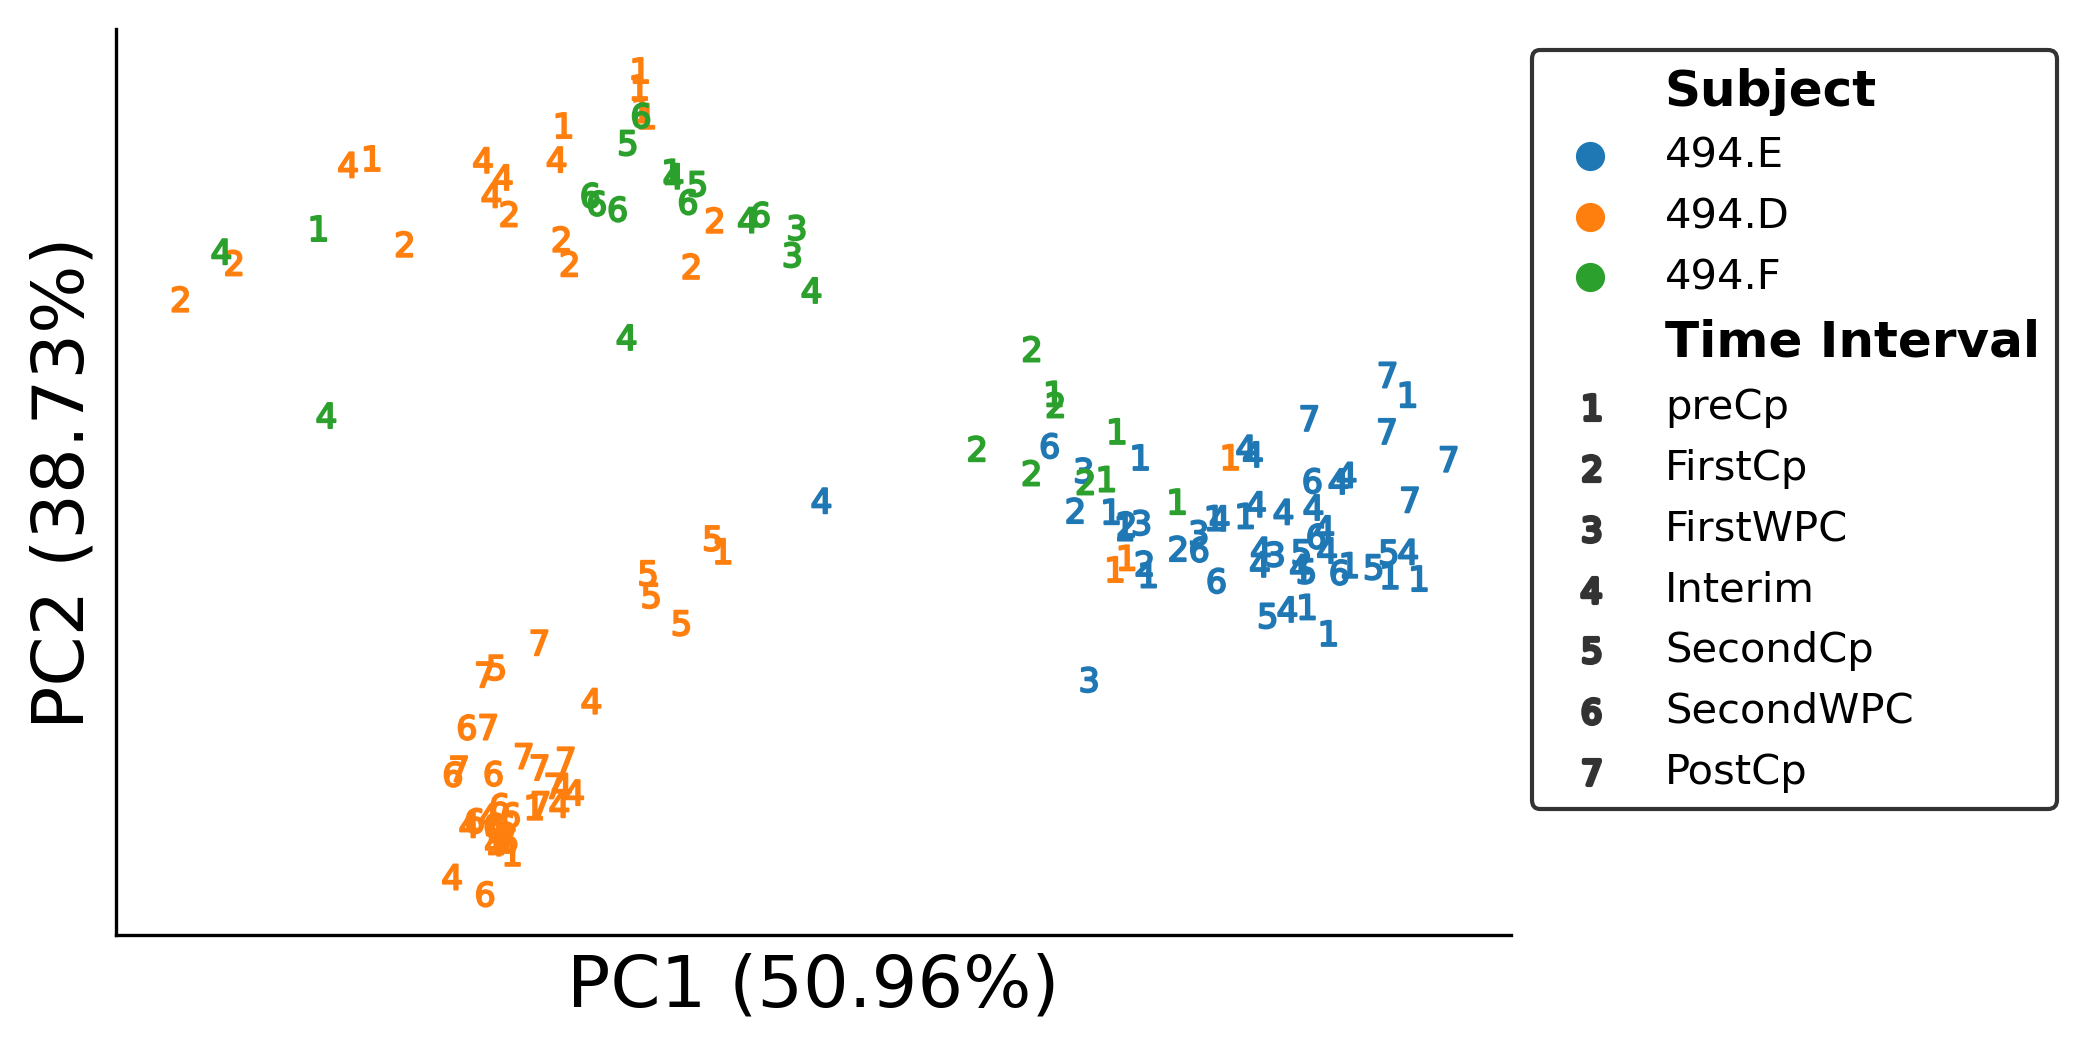

In [70]:
fig, ax = plt.subplots(1, 1)

time_markers = dict(zip(
    levels,
    [f"${i+1}$" for i in range(len(levels))]
))

sns.scatterplot(
    data=samp_axes,
    x="PC1",
    y="PC2",
    hue="Subject",
    style="Time Interval",
    markers=time_markers,
    edgecolor=None,
    ax=ax,
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles=handles,
    loc="upper left",
    bbox_to_anchor=[1, 1],
    fontsize="medium",
    edgecolor="black"
)
for t in ax.get_legend().texts:
    if t._text in ("Subject", "Time Interval"):
        t.set_weight("bold")
        t.set_fontsize("large")
        
prop_exp = ord_res.proportion_explained
        
ax.set_xticks([])
ax.set_yticks([])

pc_var = prop_exp * 100
ax.set_xlabel(f"PC1 ({pc_var[0]:.2f}%)", fontsize="xx-large")
ax.set_ylabel(f"PC2 ({pc_var[1]:.2f}%)", fontsize="xx-large")

plt.savefig("../figures/relman_abx/rpca_numbers.pdf")
plt.show()